# **New York City Yellow Taxi Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Assignments/EDA/NYC_Taxi/trip_records')

### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [ ]:
# Try loading one file
df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/drive/MyDrive/Assignments/EDA/NYC_Taxi/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        monthly_data = pd.read_parquet(file_path)

        # Convert the 'tpep_pickup_datetime' column to datetime format
        monthly_data['tpep_pickup_datetime'] = pd.to_datetime(monthly_data['tpep_pickup_datetime'])


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in monthly_data['tpep_pickup_datetime'].dt.date.unique():
          daily_data = monthly_data[monthly_data['tpep_pickup_datetime'].dt.date == date]
          # Iterate through each hour of the selected date
          for hour in range(24):
            hour_data = daily_data[daily_data['tpep_pickup_datetime'].dt.hour == hour]
                # Sample 5% of the hourly data randomly
            sample = hour_data.sample(frac=0.05, random_state=42)
                # Append the sampled data to the sampled_data dataframe
                # add data of this hour to the dataframe
            sampled_data = pd.concat([sampled_data, sample])

        # Append the sampled data for the current date to the final dataframe

        df = pd.concat([df, sampled_data]) # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
df.to_parquet('sampled_data.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [ ]:
# Load the new data file
sampled_taxi_records = pd.read_parquet('sampled_data.parquet')


In [ ]:
sampled_taxi_records.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2860            2  2023-10-01 00:23:53   2023-10-01 00:39:27              1.0   
3367902         1  2023-10-01 00:50:53   2023-10-01 01:02:20              NaN   
5351            2  2023-10-01 00:29:10   2023-10-01 00:44:05              1.0   
4877            2  2023-10-01 00:18:30   2023-10-01 00:24:46              1.0   
5090            2  2023-10-01 00:03:58   2023-10-01 00:24:56              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
2860              3.24         1.0                  N           148   
3367902           0.00         NaN               None            79   
5351              3.30         1.0                  N           141   
4877              0.93         1.0                  N            79   
5090              3.83         1.0                  N           236   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
2860               97             1        18.40    1.0      0.5        5.85   
3367902           231             0        18.17    0.0      0.5        0.00   
5351               74             2        17.70    1.0      0.5        0.00   
4877              107             1         7.90    1.0      0.5        2.58   
5090               90             1        21.90    1.0      0.5        3.10   

         tolls_amount  improvement_surcharge  total_amount  \
2860              0.0                    1.0         29.25   
3367902           0.0                    1.0         22.17   
5351              0.0                    1.0         22.70   
4877              0.0                    1.0         15.48   
5090              0.0                    1.0         30.00   

         congestion_surcharge  Airport_fee  airport_fee  
2860                      2.5          0.0          NaN  
3367902                   NaN          NaN          NaN  
5351                      2.5          0.0          NaN  
4877                      2.5          0.0          NaN  
5090                      2.5          0.0          NaN

In [ ]:
sampled_taxi_records.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2086000 entries, 2860 to 3646138
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            f

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [ ]:
# Fix the index and drop any columns that are not needed

sampled_taxi_records.reset_index(drop=True, inplace=True) #reseting the index


In [ ]:
# Calculate the percentage of null values in the dataset
sampled_taxi_records.isna().mean().sort_values(ascending= False) * 100

airport_fee              92.170901
Airport_fee              11.254794
passenger_count           3.425695
congestion_surcharge      3.425695
RatecodeID                3.425695
store_and_fwd_flag        3.425695
mta_tax                   0.000000
total_amount              0.000000
improvement_surcharge     0.000000
tolls_amount              0.000000
tip_amount                0.000000
VendorID                  0.000000
extra                     0.000000
tpep_pickup_datetime      0.000000
payment_type              0.000000
DOLocationID              0.000000
PULocationID              0.000000
trip_distance             0.000000
tpep_dropoff_datetime     0.000000
fare_amount               0.000000
dtype: float64

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [ ]:
# Combine the two airport fee columns

#replacing the missing values in both 'airport_fee' and 'Airport_fee' with the median;  this will ensure there is no data loss
sampled_taxi_records['airport_fee'].fillna(sampled_taxi_records['Airport_fee'].median(), inplace=True)
sampled_taxi_records['Airport_fee'].fillna(sampled_taxi_records['airport_fee'].median(), inplace=True)

#now combining the two colummns
sampled_taxi_records['airport_fee'] = sampled_taxi_records['airport_fee'] + sampled_taxi_records['Airport_fee']


In [ ]:
#to avoid the redundancy in column we can now drop the 'Airport_fee' column:
sampled_taxi_records.drop(columns=['Airport_fee'], inplace=True)

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [ ]:
# check where values of fare amount are negative
sampled_taxi_records[sampled_taxi_records['fare_amount'] < 0]

#ANALYSIS : No negative values present in 'fare_amount'

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts
sampled_taxi_records['RatecodeID'].min()


1.0

In [ ]:
# Find which columns have negative values

#to find only negative values in columns having neumeric datatpe:
sampled_taxi_records.dtypes.unique().tolist() # using this code we have analysed that there is 'int64'and 'float64' neumeric data types available in the dataset

#to subset columns with only neumeric data type:
columns_neumeric = sampled_taxi_records.select_dtypes(include=['int64', 'float64']).columns.tolist()

#subsetting the data frame:
sampled_taxi_records[columns_neumeric].apply(lambda x: x < 0).sum().sort_values(ascending=False) / sampled_taxi_records.shape[0] * 100

# ANALYSIS : the percentage of negative values is less than 1 % of the data.


improvement_surcharge    0.004267
total_amount             0.004267
mta_tax                  0.003931
congestion_surcharge     0.002972
airport_fee              0.000863
extra                    0.000192
VendorID                 0.000000
passenger_count          0.000000
trip_distance            0.000000
RatecodeID               0.000000
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
tip_amount               0.000000
tolls_amount             0.000000
dtype: float64

In [ ]:
sampled_taxi_records.shape

(2086000, 19)

In [ ]:
# fix these negative values

# Previously we have analysed the negative values are less than 1 %; hence we can drop these records.
sampled_taxi_records.drop(sampled_taxi_records[sampled_taxi_records['improvement_surcharge'] < 0].index, inplace=True)
sampled_taxi_records.drop(sampled_taxi_records[sampled_taxi_records['total_amount'] < 0].index, inplace=True)
sampled_taxi_records.drop(sampled_taxi_records[sampled_taxi_records['mta_tax'] < 0].index, inplace=True)
sampled_taxi_records.drop(sampled_taxi_records[sampled_taxi_records['congestion_surcharge'] < 0].index, inplace=True)
sampled_taxi_records.drop(sampled_taxi_records[sampled_taxi_records['airport_fee'] < 0].index, inplace=True)
sampled_taxi_records.drop(sampled_taxi_records[sampled_taxi_records['extra'] < 0].index, inplace=True)

In [ ]:
 #ANALYSIS : 158 records have been removed from dataset

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [ ]:
# Find the proportion of missing values in each column

sampled_taxi_records.isna().mean().sort_values(ascending= False) * 100

congestion_surcharge     3.425843
passenger_count          3.425843
RatecodeID               3.425843
store_and_fwd_flag       3.425843
VendorID                 0.000000
extra                    0.000000
total_amount             0.000000
improvement_surcharge    0.000000
tolls_amount             0.000000
tip_amount               0.000000
mta_tax                  0.000000
payment_type             0.000000
fare_amount              0.000000
tpep_pickup_datetime     0.000000
DOLocationID             0.000000
PULocationID             0.000000
trip_distance            0.000000
tpep_dropoff_datetime    0.000000
airport_fee              0.000000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [ ]:
# Display the rows with null values
sampled_taxi_records[sampled_taxi_records['passenger_count'].isna()]
# Impute NaN values in 'passenger_count'
sampled_taxi_records['passenger_count'].fillna(sampled_taxi_records['passenger_count'].median(), inplace=True)

Did you find zeroes in passenger_count? Handle these.

In [ ]:
# We have analysed that the about 1.5 % of the records contains had 0 passenger during the trip
# sampled_taxi_records['passenger_count'].value_counts() / sampled_taxi_records['passenger_count'].shape[0] * 100

#imputing the zero passengers with median:
median_passenger =  sampled_taxi_records.passenger_count.median()
sampled_taxi_records['passenger_count'] = sampled_taxi_records['passenger_count'].apply(lambda x: median_passenger if x == 0 else x)

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [ ]:
# Fix missing values in 'RatecodeID'

#Analysis 1 : There is about 3.4 % of missing values present in 'RatecodeID' column
# sampled_taxi_records['RatecodeID'].isna().sum() / sampled_taxi_records.shape[0] * 100

#Analysis 2 : and about 91 % time standard rate  was applied.
#sampled_taxi_records['RatecodeID'].value_counts() / sampled_taxi_records.shape[0] * 100


# Hence impute NaN values in 'RatecodeID' with median
sampled_taxi_records['RatecodeID'].fillna(sampled_taxi_records['RatecodeID'].median(), inplace=True)


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [ ]:
# handle null values in congestion_surcharge

#Analysis 1 : There is about 3.42 % of Nan Values in 'congestion_surcharge'
# sampled_taxi_records['congestion_surcharge'].isna().sum() / sampled_taxi_records.shape[0] * 10

#Analysis 2 : about 89 % of time the amount of 2.5 was collected in 'congestion_surcharge'
# sampled_taxi_records['congestion_surcharge'].value_counts() / sampled_taxi_records.shape[0] * 100

#hence impute NaN values in 'congestion_surcharge' with median:
sampled_taxi_records['congestion_surcharge'].fillna(sampled_taxi_records['congestion_surcharge'].median(), inplace=True)


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
# Handle any remaining missing values

#finding missing values :
sampled_taxi_records.isna().sum().sort_values(ascending= False)

sampled_taxi_records['store_and_fwd_flag'].value_counts() / sampled_taxi_records.shape[0] * 100
sampled_taxi_records['store_and_fwd_flag'].isna().sum() /  sampled_taxi_records.shape[0] * 100

# #Anaysis : We found that about 96 % of the time the trip was not a store and forward trip and there are about  3.42 % of missing values.

#Hence we can drop this column as a whole assuming that the details regarding "If the trip records was stored in vehicle or not" will not be needed for further EDA.
sampled_taxi_records.drop(columns=['store_and_fwd_flag'], inplace=True)

#Handling any futher missing values:
sampled_taxi_records.dropna(inplace=True)

In [ ]:
#verifying that there is no missing values present in data:
sampled_taxi_records.isna().sum().sort_values(ascending= False)

VendorID                 0
tpep_pickup_datetime     0
congestion_surcharge     0
total_amount             0
improvement_surcharge    0
tolls_amount             0
tip_amount               0
mta_tax                  0
extra                    0
fare_amount              0
payment_type             0
DOLocationID             0
PULocationID             0
RatecodeID               0
trip_distance            0
passenger_count          0
tpep_dropoff_datetime    0
airport_fee              0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

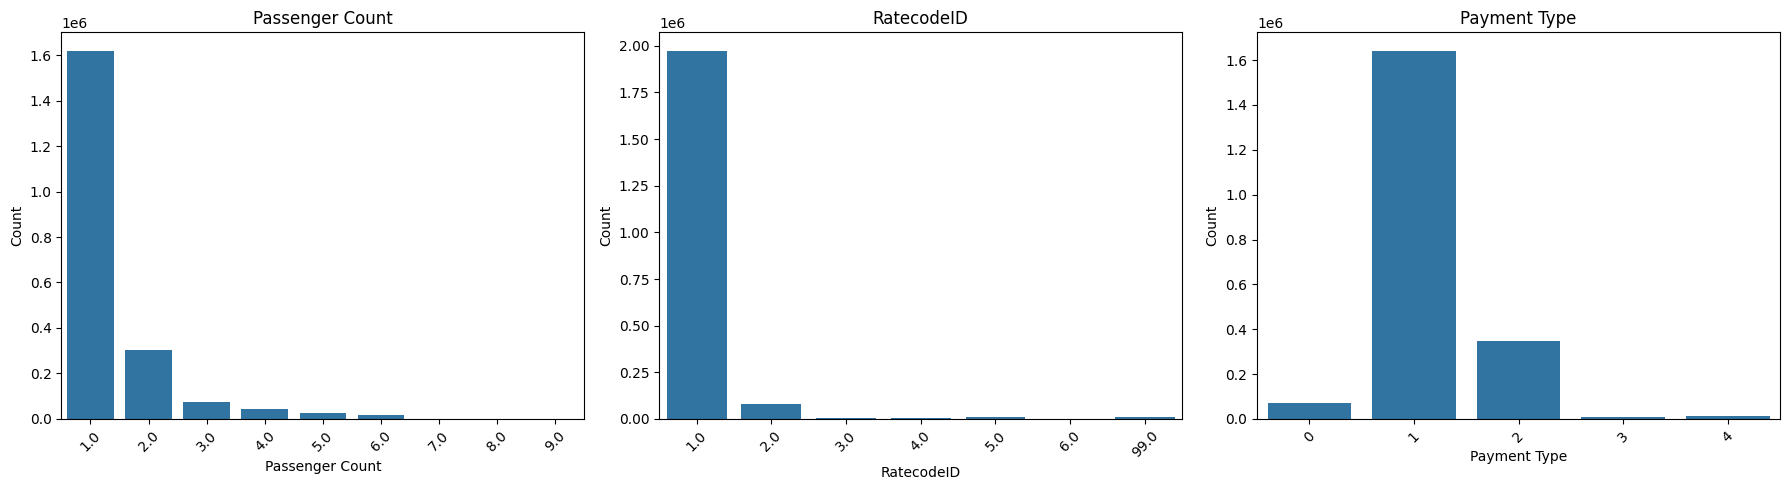

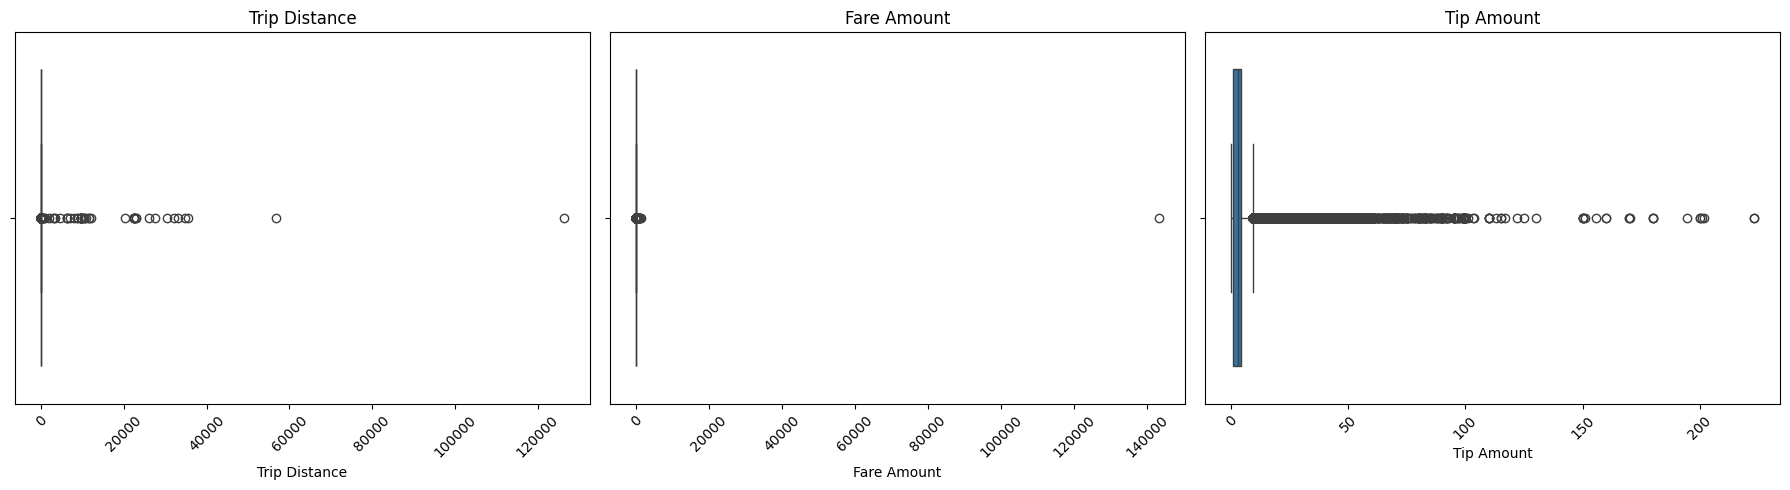

In [ ]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
# sampled_taxi_records.select_dtypes(include= ['int64', 'float64']).describe()


fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Ensure symmetrical layout

# Passenger Count
axes[0].set_title('Passenger Count')
sns.countplot(x='passenger_count', data=sampled_taxi_records, ax=axes[0])
axes[0].set_xlabel('Passenger Count')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# RatecodeID
axes[1].set_title('RatecodeID')
sns.countplot(x='RatecodeID', data=sampled_taxi_records, ax=axes[1])
axes[1].set_xlabel('RatecodeID')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

# Payment Type
axes[2].set_title('Payment Type')
sns.countplot(x='payment_type', data=sampled_taxi_records, ax=axes[2])
axes[2].set_xlabel('Payment Type')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()  # Adjust spacing
plt.show()

#Analysis subplot 1 : there are less trips with >6 passengers
#Analysis subplot 2 : RatecodeID 1 is the most common value, and there are some records with RatecodeID 99, which is not a standard value.
#Analysis subplot 3 :  Payment type 1 is the most common value, and there are some records with payment type 0, which is not a standard value.


# --- Second set of plots (Boxplots) ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Ensure symmetrical layout

# Trip Distance
axes[0].set_title('Trip Distance')
sns.boxplot(x='trip_distance', data=sampled_taxi_records, ax=axes[0])
axes[0].set_xlabel('Trip Distance')
axes[0].tick_params(axis='x', rotation=45)

# Fare Amount
axes[1].set_title('Fare Amount')
sns.boxplot(x='fare_amount', data=sampled_taxi_records, ax=axes[1])
axes[1].set_xlabel('Fare Amount')
axes[1].tick_params(axis='x', rotation=45)

# Tip Amount
axes[2].set_title('Tip Amount')
sns.boxplot(x='tip_amount', data=sampled_taxi_records, ax=axes[2])
axes[2].set_xlabel('Tip Amount')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()  # Adjust spacing
plt.show()

#Analysis subplot 1 : there are some outliers in fare_amount.
#Analysis subplot 2 : tip_amount looks, however, there seems to be 1/2 outliers, which need to validated, if those records are good or bad
#Analysis subplot 3 :  there are some outliers in trip_distance

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [ ]:
# remove passenger_count > 6
sampled_taxi_records.drop(sampled_taxi_records[sampled_taxi_records['passenger_count'] > 6].index, inplace=True)

In [ ]:
# Continue with outlier handling

#as per analysis subplot 1 we can remove the records where trip distance is greater than 250:
sampled_taxi_records.drop(sampled_taxi_records[(sampled_taxi_records['trip_distance'] > 250)].index, inplace=True)

# as per analysis subplot 2 we can remove the records where the fare amount is more than 300$
sampled_taxi_records.drop(sampled_taxi_records[(sampled_taxi_records['fare_amount'] > 300)].index, inplace=True)

# as per analysis subplot 3 we can remove the records where the tip amount is greater than 100$
sampled_taxi_records.drop(sampled_taxi_records[(sampled_taxi_records['tip_amount'] > 100)].index, inplace=True)

In [ ]:
# Do any columns need standardising?

#as per analysis subplot 3 we can remove the records where the payment type is 0
sampled_taxi_records.drop(sampled_taxi_records[(sampled_taxi_records['payment_type'] == 0)].index, inplace=True)

#as per analysis subplot 2 we can remove the records where rate code ID is 99
sampled_taxi_records.drop(sampled_taxi_records[(sampled_taxi_records['RatecodeID'] == 99)].index, inplace=True)

#as per analysis subplot 1 we can remove the records where trip distance is less than 0.5 miles and fare amount is more than 250$
sampled_taxi_records.drop(sampled_taxi_records[(sampled_taxi_records['trip_distance'] < 0.5) & (sampled_taxi_records['fare_amount'] > 250)].index, inplace=True)

#we can also check for the records where trip distance and fare amount is 0 but pickup location and drop location is diffrent:
sampled_taxi_records.drop(sampled_taxi_records[(sampled_taxi_records['trip_distance'] == 0) & (sampled_taxi_records['fare_amount'] == 0) & (sampled_taxi_records['PULocationID'] != sampled_taxi_records['DOLocationID'])].index, inplace=True)

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:  Categorical
* `tpep_pickup_datetime`: Numerical
* `tpep_dropoff_datetime`: Numerical
* `passenger_count`:  Categorical
* `trip_distance`: Numerical
* `RatecodeID`:  Categorical
* `PULocationID`: Numerical
* `DOLocationID`: Numerical
* `payment_type`: Categorical
* `pickup_hour`: Numerical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?

Answer: The following monetory parameters belong in the same categore i.e. "Numerical"

* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

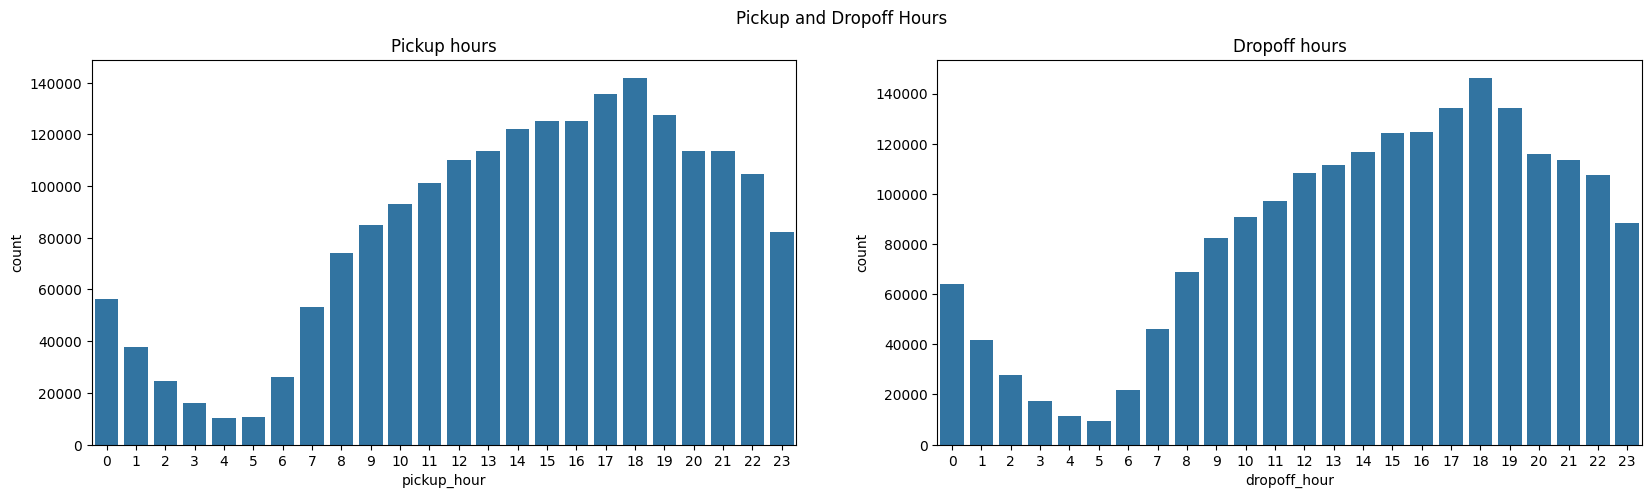

In [ ]:
# Find and show the hourly trends in taxi pickups

sampled_taxi_records['pickup_hour'] = sampled_taxi_records['tpep_pickup_datetime'].dt.hour
sampled_taxi_records['dropoff_hour'] = sampled_taxi_records['tpep_dropoff_datetime'].dt.hour
sampled_taxi_records['pickup_day'] = sampled_taxi_records['tpep_pickup_datetime'].dt.day_name()
sampled_taxi_records['dropoff_day'] = sampled_taxi_records['tpep_dropoff_datetime'].dt.day_name()
sampled_taxi_records['pickup_month'] = sampled_taxi_records['tpep_pickup_datetime'].dt.month_name()
sampled_taxi_records['dropoff_month'] = sampled_taxi_records['tpep_dropoff_datetime'].dt.month_name()

figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
figure.suptitle('Pickup and Dropoff Hours')
ax1.set_title('Pickup hours')
ax=sns.countplot(x="pickup_hour",data= sampled_taxi_records,ax=ax1)
ax2.set_title('Dropoff hours')
ax=sns.countplot(x="dropoff_hour",data=sampled_taxi_records,ax=ax2)
plt.show()

## Analysis : The busiest hours are 5:00 pm to 7:00 pm and that makes sense as this is the time when people return from their offices.

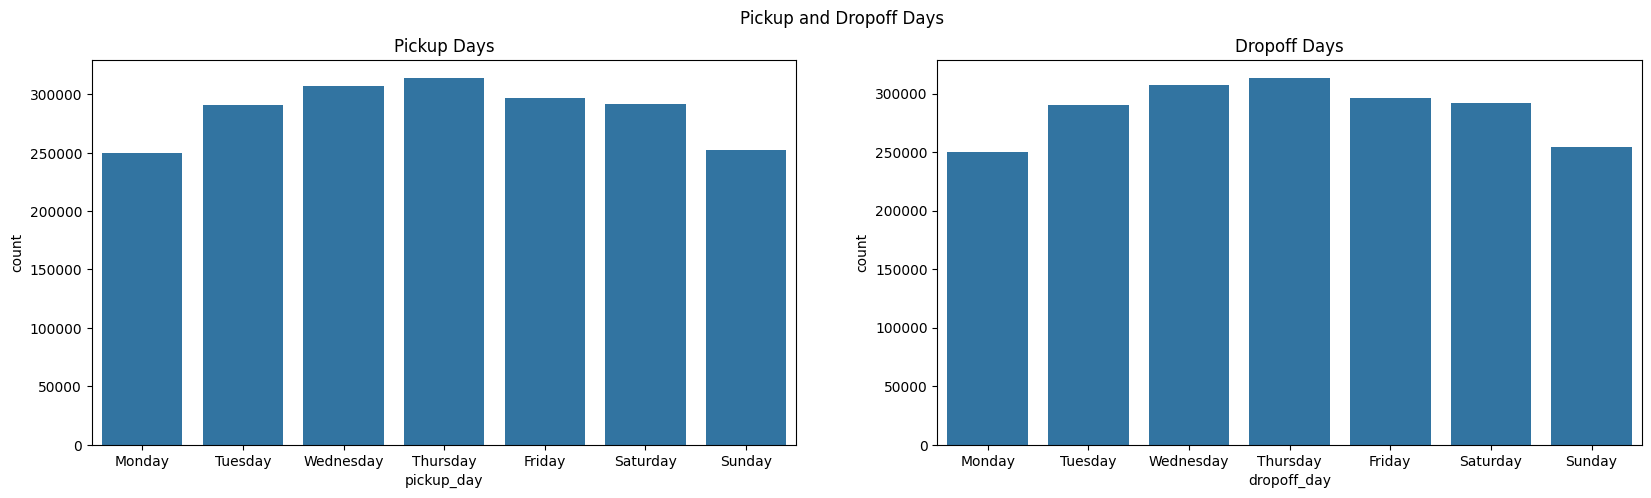

In [ ]:
# Find and show the daily trends in taxi pickups (days of the week)

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
figure.suptitle('Pickup and Dropoff Days')

ax1.set_title('Pickup Days')
ax=sns.countplot(x="pickup_day",data=sampled_taxi_records,ax=ax1, order= weekday_order)

ax2.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_day",data=sampled_taxi_records,ax=ax2, order= weekday_order)

plt.show()

## Analysis : The busiest days are Monday to Friday and that makes sense as this is the time when people go to their offices.

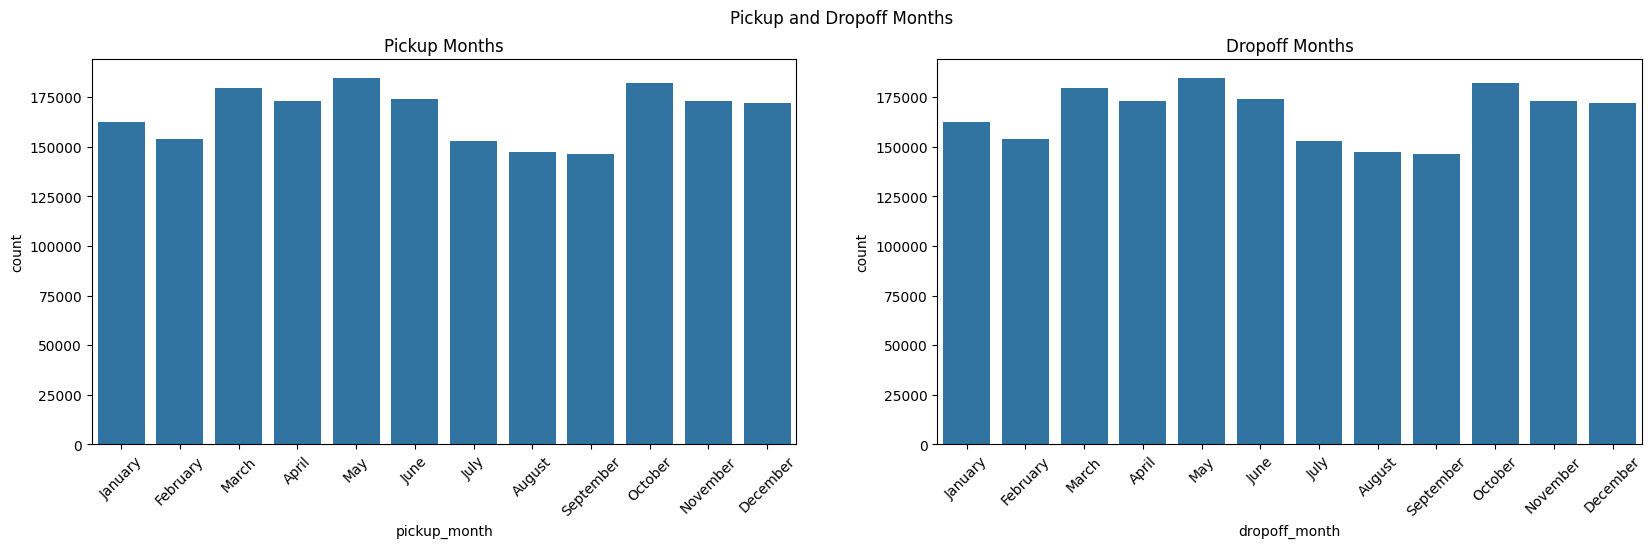

In [ ]:
# Show the monthly trends in pickups

month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
figure.suptitle('Pickup and Dropoff Months')

ax1.set_title('Pickup Months')
ax=sns.countplot(x="pickup_month",data=sampled_taxi_records,ax=ax1, order= month_order)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

ax2.set_title('Dropoff Months')
ax=sns.countplot(x="dropoff_month",data=sampled_taxi_records,ax=ax2, order= month_order)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

plt.show()
## Analysis : The busiest months are January to March and that makes sense as this is the time when people go to their offices.


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

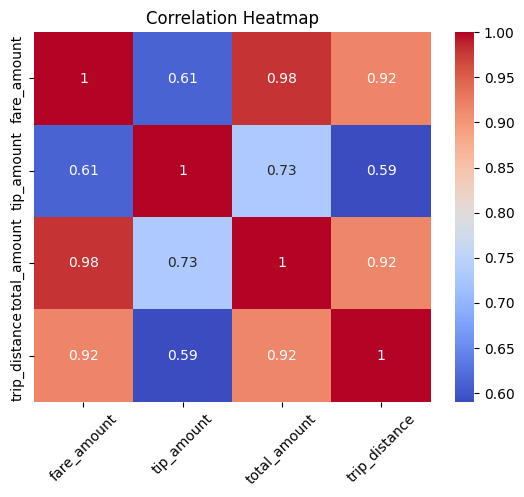

In [ ]:
# Analyse the above parameters

sampled_taxi_records[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']].describe()
# Analysis : There are zero values in fare_amount, tip_amount, total_amount, and trip_distance.


#Analysing the above parameters by their correlation:
sampled_taxi_records[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']].corr()

# Analysis : There is a strong positive correlation between fare_amount and total_amount, which makes sense as total_amount includes fare_amount.
# There is a positive correlation between tip_amount and total_amount, which makes sense as tip_amount is included in total_amount.

#plotting the correlation:
sns.heatmap(sampled_taxi_records[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.show()


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [ ]:
# Create a df with non zero entries for the selected parameters.
sampled_taxi_records_filtered = sampled_taxi_records[(sampled_taxi_records['fare_amount'] != 0) & (sampled_taxi_records['tip_amount'] != 0) & (sampled_taxi_records['total_amount'] != 0)]
sampled_taxi_records_filtered.shape

(1563067, 24)

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

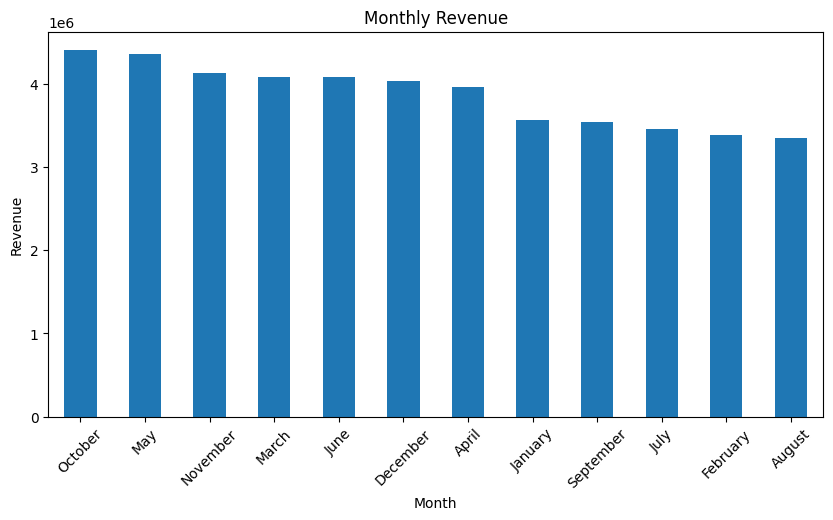

In [ ]:
# Group data by month and analyse monthly revenue

plt.figure(figsize=(10, 5))
sampled_taxi_records_filtered.groupby('pickup_month')['total_amount'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

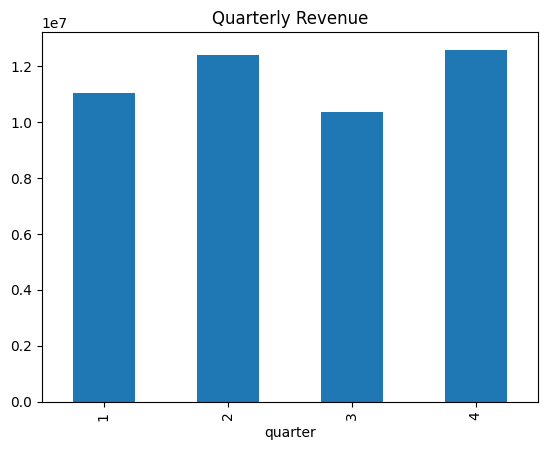

In [ ]:
# Calculate proportion of each quarter
sampled_taxi_records_filtered['quarter'] = sampled_taxi_records_filtered['tpep_pickup_datetime'].dt.quarter
sampled_taxi_records_filtered.groupby('quarter')['total_amount'].sum().plot(kind='bar')
plt.title('Quarterly Revenue')
plt.ylabel('')
plt.show()



**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

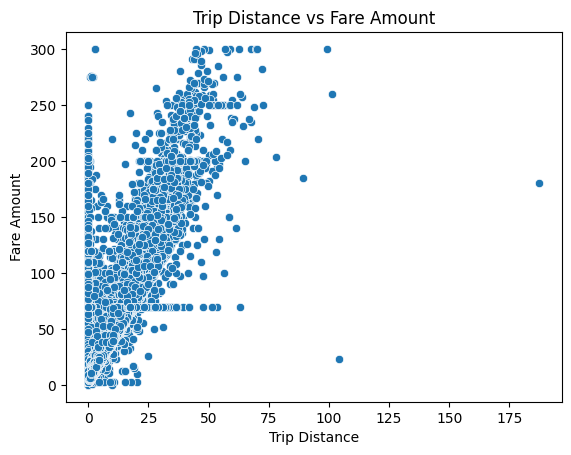

In [ ]:
# Show how trip fare is affected by distance

sampled_taxi_records_filtered['trip_distance'].corr(sampled_taxi_records_filtered['fare_amount'])
sns.scatterplot(x='trip_distance', y='fare_amount', data=sampled_taxi_records_filtered)
plt.title('Trip Distance vs Fare Amount')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

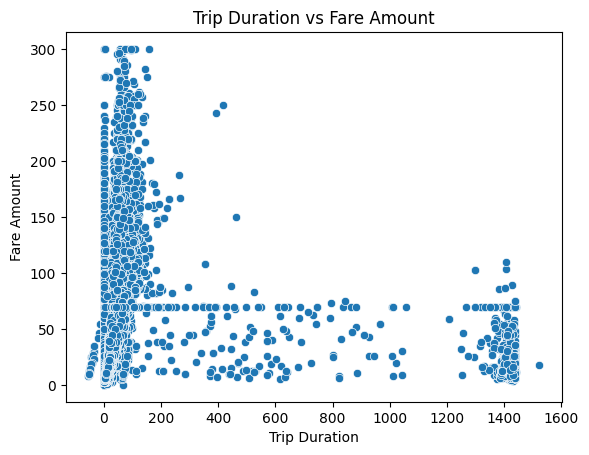

In [ ]:
# Show relationship between fare and trip duration
sampled_taxi_records_filtered['trip_duration'] = (sampled_taxi_records_filtered['tpep_dropoff_datetime'] - sampled_taxi_records_filtered['tpep_pickup_datetime']).dt.total_seconds() / 60
sampled_taxi_records_filtered['trip_duration'].corr(sampled_taxi_records_filtered['fare_amount'])
sns.scatterplot(x='trip_duration', y='fare_amount', data=sampled_taxi_records_filtered)
plt.title('Trip Duration vs Fare Amount')
plt.xlabel('Trip Duration')
plt.ylabel('Fare Amount')
plt.show()


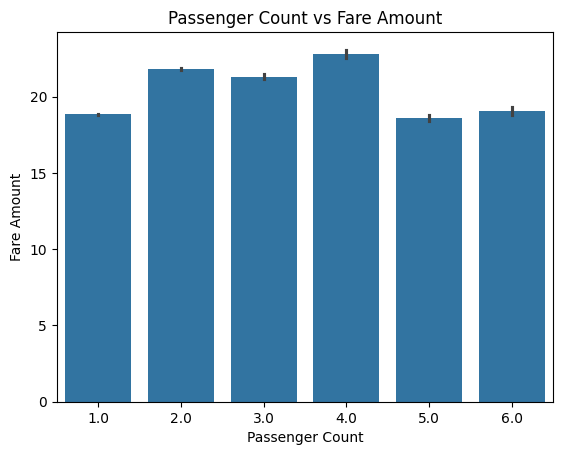

In [ ]:
# Show relationship between fare and number of passengers
sampled_taxi_records_filtered['passenger_count'].corr(sampled_taxi_records_filtered['fare_amount'])
sns.barplot(x='passenger_count', y='fare_amount', data=sampled_taxi_records_filtered)
plt.title('Passenger Count vs Fare Amount')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount')
plt.show()


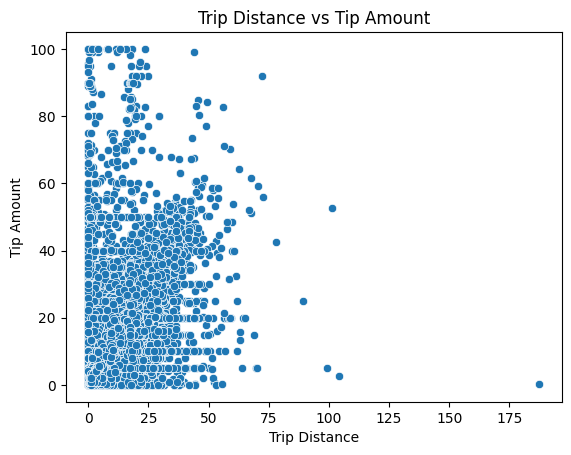

In [ ]:
# Show relationship between tip and trip distance
sampled_taxi_records_filtered['tip_amount'].corr(sampled_taxi_records_filtered['trip_distance'])
sns.scatterplot(x='trip_distance', y='tip_amount', data=sampled_taxi_records_filtered)
plt.title('Trip Distance vs Tip Amount')
plt.xlabel('Trip Distance')
plt.ylabel('Tip Amount')
plt.show()


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

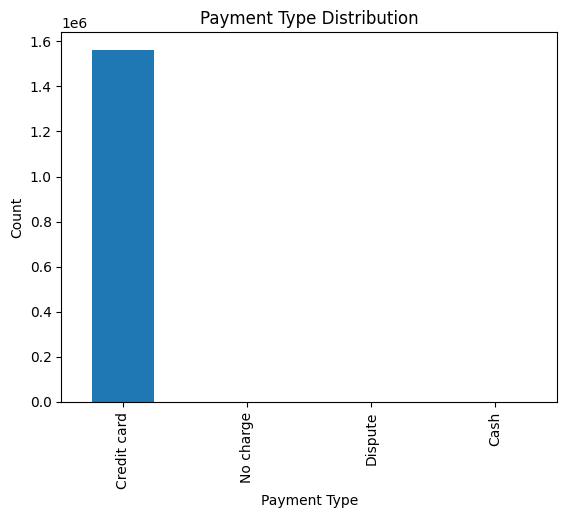

In [ ]:
# Analyse the distribution of different payment types (payment_type).

# sampled_taxi_records_filtered['payment_type'].unique()

def payment_type_mapping(payment_type):
    if payment_type == 1:
        return 'Credit card'
    elif payment_type == 2:
        return 'Cash'
    elif payment_type == 3:
        return 'No charge'
    elif payment_type == 4:
        return 'Dispute'
    elif payment_type == 5:
        return 'Unknown'
    else:
        return 'Unknown'

sampled_taxi_records_filtered['payment_type'] = sampled_taxi_records_filtered['payment_type'].apply(payment_type_mapping)
sampled_taxi_records_filtered['payment_type'].value_counts().plot(kind='bar')
plt.title('Payment Type Distribution')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.show()



- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [ ]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('/content/drive/MyDrive/Assignments/EDA/NYC_Taxi/taxi_zones/taxi_zones.shp') # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


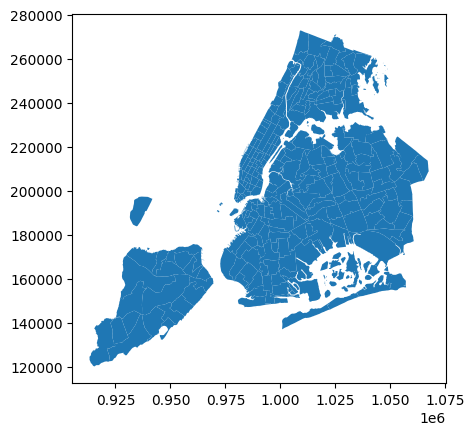

In [ ]:
print(zones.info())

zones.plot()
plt.show()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [ ]:
# Merge zones and trip records using locationID and PULocationID

sampled_taxi_records_filtered = sampled_taxi_records_filtered.merge(zones, left_on='PULocationID', right_on='LocationID', how= 'left')
sampled_taxi_records_filtered.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-10-01 00:23:53   2023-10-01 00:39:27              1.0   
1         2  2023-10-01 00:18:30   2023-10-01 00:24:46              1.0   
2         2  2023-10-01 00:03:58   2023-10-01 00:24:56              1.0   
3         2  2023-10-01 00:09:38   2023-10-01 00:18:45              1.0   
4         2  2023-10-01 00:19:14   2023-10-01 00:31:19              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID payment_type  \
0           3.24         1.0           148            97  Credit card   
1           0.93         1.0            79           107  Credit card   
2           3.83         1.0           236            90  Credit card   
3           2.48         1.0           141           137  Credit card   
4           2.27         1.0           249            48  Credit card   

   fare_amount  ...  dropoff_month  quarter  trip_duration  OBJECTID  \
0         18.4  ...        October        4      15.566667     148.0   
1          7.9  ...        October        4       6.266667      79.0   
2         21.9  ...        October        4      20.966667     236.0   
3         12.8  ...        October        4       9.116667     141.0   
4         14.2  ...        October        4      12.083333     249.0   

   Shape_Leng  Shape_Area                   zone  LocationID    borough  \
0    0.039131    0.000070        Lower East Side       148.0  Manhattan   
1    0.042625    0.000108           East Village        79.0  Manhattan   
2    0.044252    0.000103  Upper East Side North       236.0  Manhattan   
3    0.041514    0.000077        Lenox Hill West       141.0  Manhattan   
4    0.036384    0.000072           West Village       249.0  Manhattan   

                                            geometry  
0  POLYGON ((988552.836 201677.665, 988387.669 20...  
1  POLYGON ((988746.067 202151.955, 988733.885 20...  
2  POLYGON ((995940.048 221122.92, 995812.322 220...  
3  POLYGON ((994839.073 216123.698, 994786.74 216...  
4  POLYGON ((983555.319 204876.901, 983469.158 20...  

[5 rows x 33 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [ ]:
# Group data by location and calculate the number of trips

pickup_location = sampled_taxi_records_filtered.groupby(['PULocationID', 'zone']).size().reset_index(name='number_of_trips')
pickup_location.sort_values(by='number_of_trips', ascending=False, inplace=True)
pickup_location.head(10)

PULocationID                          zone  number_of_trips
208           237         Upper East Side South            77187
140           161                Midtown Center            74887
114           132                   JFK Airport            70448
207           236         Upper East Side North            70231
141           162                  Midtown East            58162
120           138             LaGuardia Airport            56939
123           142           Lincoln Square East            53985
163           186  Penn Station/Madison Sq West            53643
201           230     Times Sq/Theatre District            48949
149           170                   Murray Hill            47666

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [ ]:
# Merge trip counts back to the zones GeoDataFrame

zones = zones.merge(pickup_location, left_on='zone', right_on='zone', how='left')
zones.sort_values(by='number_of_trips', ascending=False)
zones.head()




OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID  number_of_trips  
0           1.0            136.0  
1           2.0              3.0  
2           NaN              NaN  
3           4.0           1577.0  
4           NaN              NaN

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

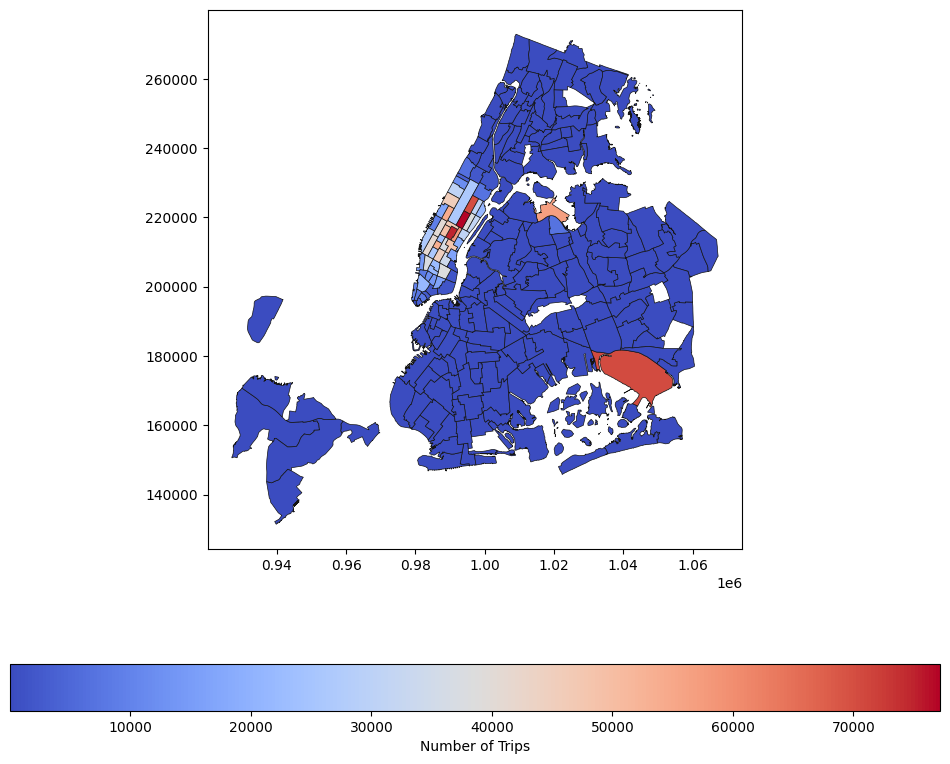

In [ ]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zones.plot(column='number_of_trips', ax=ax, legend=True, legend_kwds={'label': "Number of Trips", 'orientation': "horizontal"}, cmap= 'coolwarm',  edgecolor='0.08', linewidth=0.5)
plt.show()


In [ ]:
# can you try displaying the zones DF sorted by the number of trips?
zones.sort_values(by='number_of_trips', ascending=False, inplace=True)
zones.head(10)


OBJECTID  Shape_Leng  Shape_Area                          zone  \
236       237    0.042213    0.000096         Upper East Side South   
160       161    0.035804    0.000072                Midtown Center   
131       132    0.245479    0.002038                   JFK Airport   
235       236    0.044252    0.000103         Upper East Side North   
161       162    0.035270    0.000048                  Midtown East   
137       138    0.107467    0.000537             LaGuardia Airport   
141       142    0.038176    0.000076           Lincoln Square East   
185       186    0.024696    0.000037  Penn Station/Madison Sq West   
229       230    0.031028    0.000056     Times Sq/Theatre District   
169       170    0.045769    0.000074                   Murray Hill   

     LocationID    borough                                           geometry  \
236         237  Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
160         161  Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
131         132     Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
235         236  Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
161         162  Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   
137         138     Queens  MULTIPOLYGON (((1019904.219 225677.983, 102031...   
141         142  Manhattan  POLYGON ((989380.305 218980.247, 989359.803 21...   
185         186  Manhattan  POLYGON ((986752.603 210853.699, 986627.863 21...   
229         230  Manhattan  POLYGON ((988786.877 214532.094, 988650.277 21...   
169         170  Manhattan  POLYGON ((991999.299 210994.739, 991972.635 21...   

     PULocationID  number_of_trips  
236         237.0          77187.0  
160         161.0          74887.0  
131         132.0          70448.0  
235         236.0          70231.0  
161         162.0          58162.0  
137         138.0          56939.0  
141         142.0          53985.0  
185         186.0          53643.0  
229         230.0          48949.0  
169         170.0          47666.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

 **Summary of Findings from General Analysis**

**Trends in Taxi Activity**  
- **Peak Hours:**  
  - Taxi pickups and drop-offs peak during **evening rush hours (5:00 PM - 7:00 PM)**, coinciding with office commuters returning home.  
- **Weekday vs. Weekend Patterns:**  
  - **Wednesdays and Thursdays** record the highest taxi activity, likely due to mid-week work commutes.  
  - **Weekends show slightly lower demand** as fewer people commute for work.  
- **Seasonal Variations:**  
  - **Summer months (May–June)** and **Q4 (October–December)** experience higher taxi activity.  
  - Increased demand is likely driven by **holidays, festivals, and tourism surges** in these periods.  

**Revenue Collection Trends**  
- **Quarterly Revenue Insights:**  
  - The highest revenue occurs in **Q2 (May–July) and Q4 (October–December)**.  
  - **Q4 is the peak revenue period**, aligning with the festive season and increased travel demand.  

**Financial Analysis**  
- **Fare vs. Trip Distance:**  
  - A **strong positive correlation** exists between trip distance and fare—**longer trips yield higher fares**.  
- **Fare vs. Trip Duration:**  
  - A **moderate correlation** exists between trip duration and fare, but pricing is more dependent on distance.  
- **Fare vs. Passenger Count:**  
  - **Trips with more than one passenger tend to have higher fares**, with **4-passenger trips generating the most revenue**.  
- **Tips vs. Trip Distance:**  
  - **Longer trips generally receive higher tips**, likely due to increased passenger satisfaction and service duration.  

**Busiest Pickup Zones**  
- **Top high-traffic pickup locations:**  
  -  **Upper East Side South**  
  -  **Midtown Center**  
  -  **Upper East Side North**  
  -  **JFK Airport**  
  -  **Midtown East**  
- These locations serve as **key business hubs, transit points, and high-demand areas** for daily commuters and travelers.  


You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
# Find routes which have the slowest speeds at different times of the day

#preparing the data for further analysis:

#dropping the columns that are not needed:
sampled_taxi_records_filtered.drop(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'borough', 'geometry'], axis=1, inplace=True)

#renaming columns for better understanding:
sampled_taxi_records_filtered.rename(columns={'zone': 'pickup_zone'}, inplace=True)

#dropping the locationID:
sampled_taxi_records_filtered.drop(['LocationID'], axis=1, inplace=True)

#merging to get the drop off zone:
sampled_taxi_records_filtered = sampled_taxi_records_filtered.merge(zones[['LocationID', 'zone']], left_on='DOLocationID', right_on='LocationID', how= 'left')
sampled_taxi_records_filtered.rename(columns={'zone': 'dropoff_zone'}, inplace=True)
sampled_taxi_records_filtered.drop(['LocationID'], axis=1, inplace=True)

#sampling the records with non zero trip duration:
sampled_taxi_records_filtered = sampled_taxi_records_filtered[sampled_taxi_records_filtered['trip_duration'] > 0]

# Ensure pickup and drop-off locations are different
sampled_taxi_records_filtered = sampled_taxi_records_filtered[sampled_taxi_records_filtered['PULocationID'] != sampled_taxi_records_filtered['DOLocationID']]


#Calculating the speed of each trip:
sampled_taxi_records_filtered['speed'] = sampled_taxi_records_filtered['trip_distance'] / (sampled_taxi_records_filtered['trip_duration'] / 3600)

#Group by the pickup zone, drop zone and pickup hour to find the slowest speed:
slow_routes = sampled_taxi_records_filtered.groupby(['pickup_zone', 'dropoff_zone', 'pickup_hour', 'PULocationID', 'DOLocationID'])['speed'].mean().reset_index()
slow_routes.sort_values(by='speed', ascending=True, inplace=True)




In [ ]:

#Top 10 slowest routes:
slow_routes.head(10)

pickup_zone               dropoff_zone  pickup_hour  \
19277        East Williamsburg  Williamsburg (North Side)            2   
31285         Hamilton Heights               Central Park           10   
84459    Upper East Side North             Manhattanville           18   
69538  Queensbridge/Ravenswood                    Astoria           12   
44771          Lenox Hill West                    Erasmus           19   
88974    Upper West Side South    Greenwich Village North            5   
79453  Two Bridges/Seward Park                   Elmhurst           23   
66913               Ozone Park               Howard Beach           18   
98319           Yorkville West                  Ridgewood           19   
14099            East Elmhurst        Crown Heights South           17   

       PULocationID  DOLocationID  speed  
19277            80           255    0.0  
31285           116            43    0.0  
84459           236           152    0.0  
69538           193             7    0.0  
44771           141            85    0.0  
88974           239           113    0.0  
79453           232            82    0.0  
66913           180           124    0.0  
98319           263           198    0.0  
14099            70            62    0.0

How does identifying high-traffic, high-demand routes help us?

The Importance of Identifying High-Traffic, High-Demand Routes
Understanding which routes experience the highest demand and traffic congestion offers numerous benefits for taxi companies, passengers, and city planners. Here’s how this insight can drive efficiency and improve service quality:

Optimized Fleet Allocation: By pinpointing high-demand routes, taxi companies can strategically deploy more vehicles during peak hours, ensuring sufficient availability and reducing service gaps.
Reduced Wait Times & Improved Customer Satisfaction: A well-balanced fleet distribution means passengers experience shorter wait times, leading to a smoother and more reliable ride-hailing experience.
Dynamic Pricing for Revenue Maximization: Demand-based fare adjustments can help optimize revenue during rush hours, while also encouraging rides during off-peak times to balance demand.
Efficient Route Planning & Fuel Savings: Insights into traffic patterns enable better route optimization, helping drivers avoid congestion, minimize idle time, and reduce fuel consumption.
Enhanced Service Reliability: Ensuring that taxis are consistently available on popular routes strengthens customer trust and encourages repeat usage.
Traffic Flow & Infrastructure Improvements: Identifying bottlenecks and frequently congested areas allows for targeted interventions, such as adjusting traffic signals, recommending alternative routes, or collaborating with city planners for long-term solutions.
By leveraging data on high-traffic routes, taxi services can enhance operational efficiency, boost profitability, and contribute to a more seamless urban mobility experience.

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

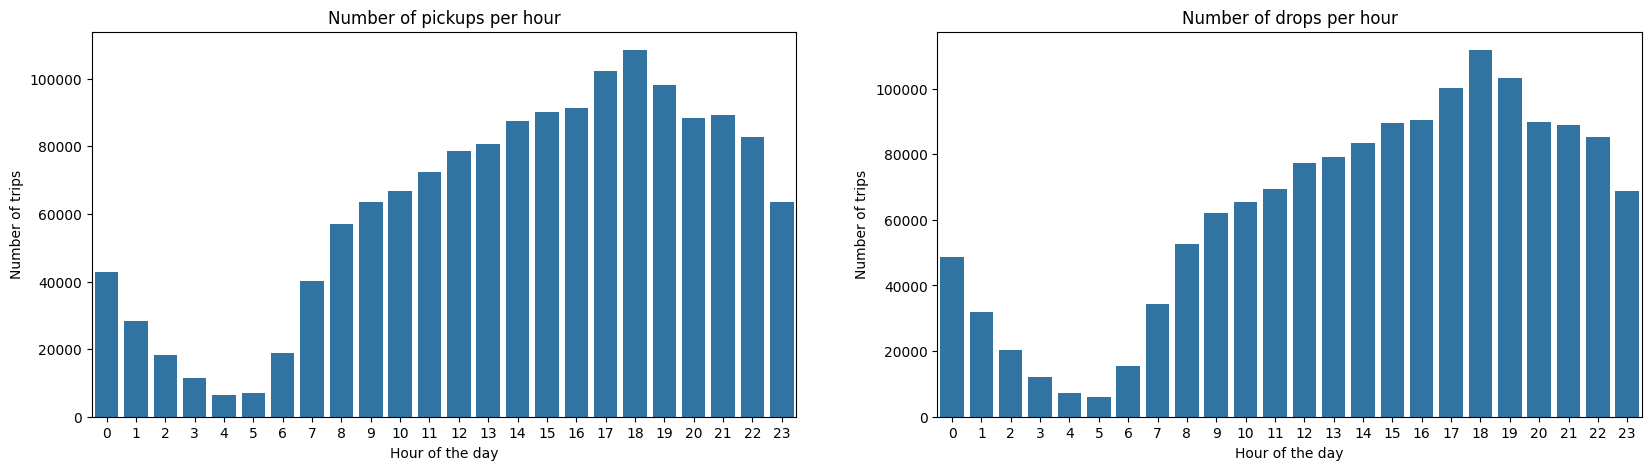

In [ ]:
# Visualise the number of trips per hour and find the busiest hour

figure,(ax1, ax2) = plt.subplots(ncols= 2, figsize = (20, 5))
ax1.set_title('Number of pickups per hour')
ax1.set_xlabel('Hour of the day')
ax1.set_ylabel('Number of trips')
ax= sns.countplot(x="pickup_hour",data=sampled_taxi_records_filtered,ax=ax1)

ax2.set_title('Number of drops per hour')
ax2.set_xlabel('Hour of the day')
ax2.set_ylabel('Number of trips')
ax= sns.countplot(x="dropoff_hour",data=sampled_taxi_records_filtered,ax=ax2)
plt.show()

# From the plot, the busiest hours are 5:00 pm to 7:00 pm and that makes sense as this is the time when people return from their offices.

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05

#calculate the hourly trips:
hourly_trips = sampled_taxi_records_filtered['pickup_hour'].value_counts().sort_index()

#scaling up to find the  actual hourly trips:
upscaled_hourly_trips = hourly_trips * sample_fraction


#Actual number of trips in top 5 busiest hours:
upscaled_hourly_trips.sort_values(ascending=False).head(5).reset_index(name='number_of_trips')



pickup_hour  number_of_trips
0           18          5423.50
1           17          5108.15
2           19          4902.90
3           16          4570.95
4           15          4500.25

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

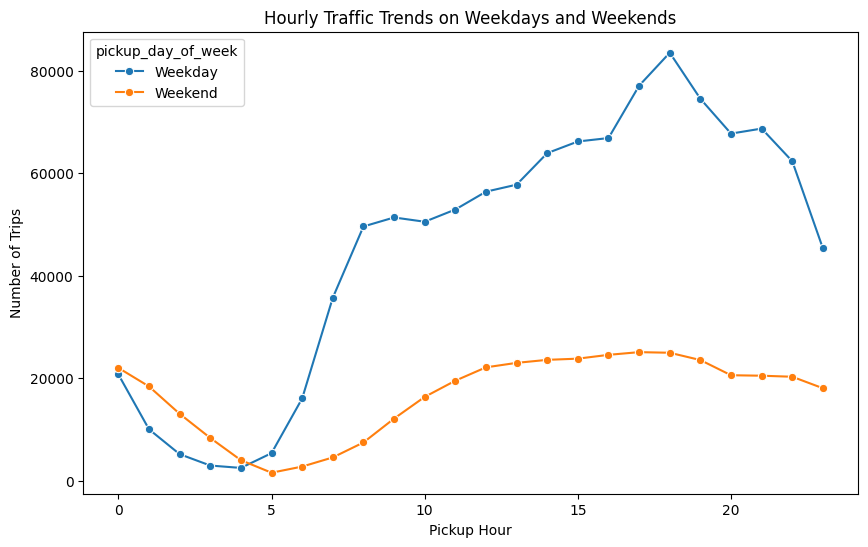

In [ ]:
# Compare traffic trends for the week days and weekends

#calculating the day of week:

sampled_taxi_records_filtered['pickup_day_of_week'] = sampled_taxi_records_filtered['tpep_pickup_datetime'].dt.day_name()

#Calculating trips over weekdays and weekends per hour:

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekends = ['Saturday', 'Sunday']

weekday_trips = sampled_taxi_records_filtered[sampled_taxi_records_filtered['pickup_day_of_week'].isin(weekdays)]
weekend_trips = sampled_taxi_records_filtered[sampled_taxi_records_filtered['pickup_day_of_week'].isin(weekends)]


# Count trips per pickup hour
weekday_trips_df = weekday_trips.groupby('pickup_hour').size().reset_index(name='Number_of_trips')
weekday_trips_df['pickup_day_of_week'] = 'Weekday'

weekend_trips_df = weekend_trips.groupby('pickup_hour').size().reset_index(name='Number_of_trips')
weekend_trips_df['pickup_day_of_week'] = 'Weekend'


#merging the dataframes:
weekly_trips = pd.concat([weekday_trips_df, weekend_trips_df])


#Analysing using line plot:
plt.figure(figsize=(10, 6))
sns.lineplot(x='pickup_hour', y='Number_of_trips', hue='pickup_day_of_week', data=weekly_trips, marker='o', linewidth=1.5, ci=None)
plt.title('Hourly Traffic Trends on Weekdays and Weekends')
plt.xlabel('Pickup Hour')
plt.ylabel('Number of Trips')
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**Insights from the Traffic Pattern Chart:**
Weekday vs. Weekend Trends:

Weekdays (Blue Line) → Have significantly more trips than weekends, especially during commuting hours.
Weekends (Orange Line) → Show a flatter curve, meaning demand is more evenly spread across the day with fewer extreme peaks.
Peak Hours Analysis:

Morning Peak (6 AM - 10 AM) → Steep increase in weekday trips, likely due to office commutes.
Evening Peak (4 PM - 8 PM) → Another sharp rise, aligning with people returning home from work.
Weekend Peaks (10 AM - 4 PM) → More stable, indicating leisure trips rather than work-related commutes.
Quiet Hours:

Late Night to Early Morning (Midnight - 5 AM) → Low traffic on both weekdays and weekends.
Weekends are relatively stable without sharp peaks, suggesting more leisure-based rides.

**Finding Busiest and Quite Hours Aids in following:**

For Taxi Drivers & Ride-Sharing Services:
Helps optimize work shifts (work during peak hours for higher earnings).
Predicts high-demand zones and allocates more taxis in peak areas.

For City Planning & Traffic Management:
Helps in reducing congestion by adjusting traffic signals or planning alternate routes.
Ensures better public transport scheduling (more buses/trains during peak hours).

For Businesses (Restaurants, Malls, etc.):
Understanding when people travel most helps optimize opening hours and promotions.
Delivery services can plan operations to avoid high-traffic times.


**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

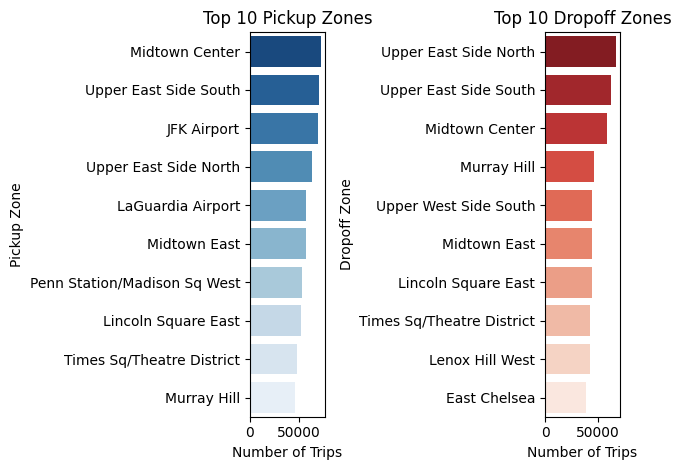

In [ ]:
# Find top 10 pickup and dropoff zones

#finding top 10 pickup zones:
top_pickupzones = sampled_taxi_records_filtered.groupby('pickup_zone')['pickup_zone'].count().reset_index(name='number_of_trips')
top10_pickupzones = top_pickupzones.sort_values(by='number_of_trips', ascending=False).head(10)


#finding top 10 dropoff zones:
top_dropoffzones = sampled_taxi_records_filtered.groupby('dropoff_zone')['dropoff_zone'].count().reset_index(name='number_of_trips')
top10_dropoffzones = top_dropoffzones.sort_values(by='number_of_trips', ascending=False).head(10)


# Plot for Pickup Zones
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
sns.barplot(y=top10_pickupzones['pickup_zone'], x=top10_pickupzones['number_of_trips'], palette='Blues_r')
plt.title("Top 10 Pickup Zones")
plt.xlabel("Number of Trips")
plt.ylabel("Pickup Zone")

# Plot for Dropoff Zones
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
sns.barplot(y=top10_dropoffzones['dropoff_zone'], x=top10_dropoffzones['number_of_trips'], palette='Reds_r')
plt.title("Top 10 Dropoff Zones")
plt.xlabel("Number of Trips")
plt.ylabel("Dropoff Zone")

plt.tight_layout()
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

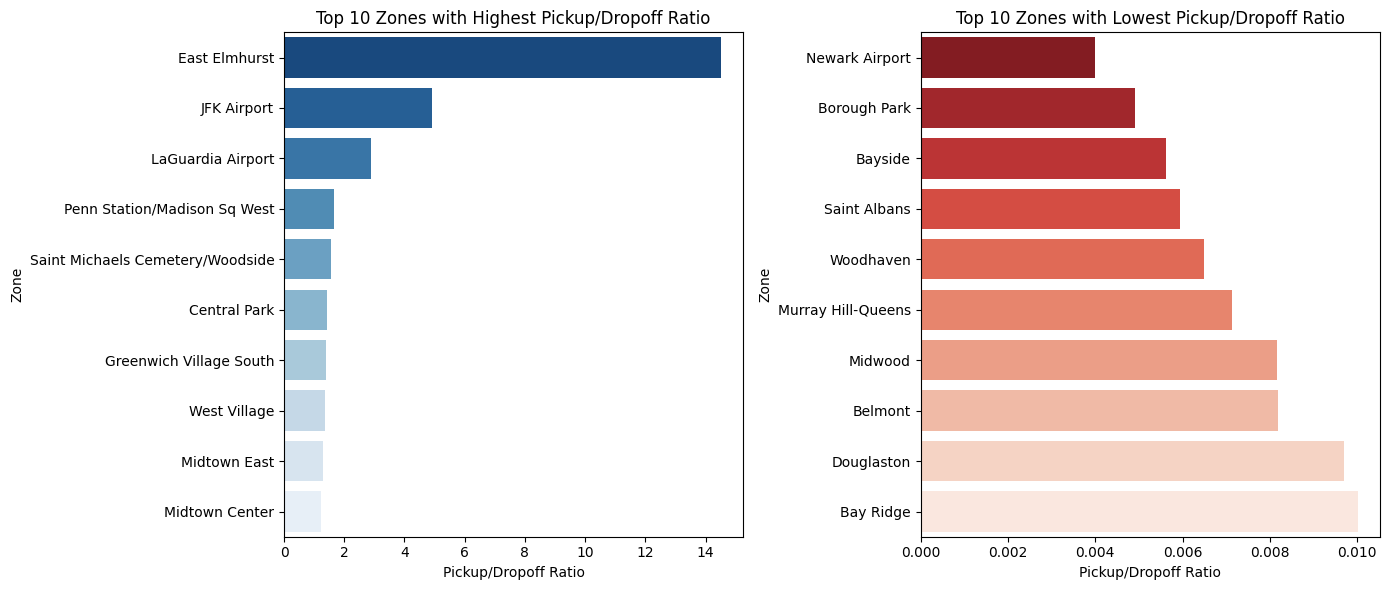

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

pickup_trip_counts = sampled_taxi_records_filtered['pickup_zone'].value_counts().reset_index()
pickup_trip_counts.columns = ['zone', 'pickup_trip_counts']


dropoff_trip_counts = sampled_taxi_records_filtered['dropoff_zone'].value_counts().reset_index()
dropoff_trip_counts.columns = ['zone', 'dropoff_trip_counts']

zone_trip_counts = pd.merge(pickup_trip_counts, dropoff_trip_counts, on='zone', how='outer').fillna(0)

zone_trip_counts = zone_trip_counts.astype({'pickup_trip_counts': 'int', 'dropoff_trip_counts': 'int'})
zone_trip_counts['pickup_dropoff_ratio'] = zone_trip_counts['pickup_trip_counts'] / zone_trip_counts['dropoff_trip_counts'].replace(0, np.nan)


# Drop inf/nan values
zone_trip_counts = zone_trip_counts.replace(np.inf, np.nan).dropna()


highest_pickup_dropoff_ratio = zone_trip_counts.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)
lowest_pickup_dropoff_ratio = zone_trip_counts[zone_trip_counts['pickup_dropoff_ratio']> 0].sort_values(by='pickup_dropoff_ratio', ascending=True).head(10)


# ---- Visualization ----
plt.figure(figsize=(14, 6))

# Highest pickup/dropoff ratio
plt.subplot(1, 2, 1)
sns.barplot(y=highest_pickup_dropoff_ratio['zone'], x=highest_pickup_dropoff_ratio['pickup_dropoff_ratio'], palette='Blues_r')
plt.title("Top 10 Zones with Highest Pickup/Dropoff Ratio")
plt.xlabel("Pickup/Dropoff Ratio")
plt.ylabel("Zone")

# Lowest pickup/dropoff ratio
plt.subplot(1, 2, 2)
sns.barplot(y=lowest_pickup_dropoff_ratio['zone'], x=lowest_pickup_dropoff_ratio['pickup_dropoff_ratio'], palette='Reds_r')
plt.title("Top 10 Zones with Lowest Pickup/Dropoff Ratio")
plt.xlabel("Pickup/Dropoff Ratio")
plt.ylabel("Zone")

plt.tight_layout()
plt.show()




**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

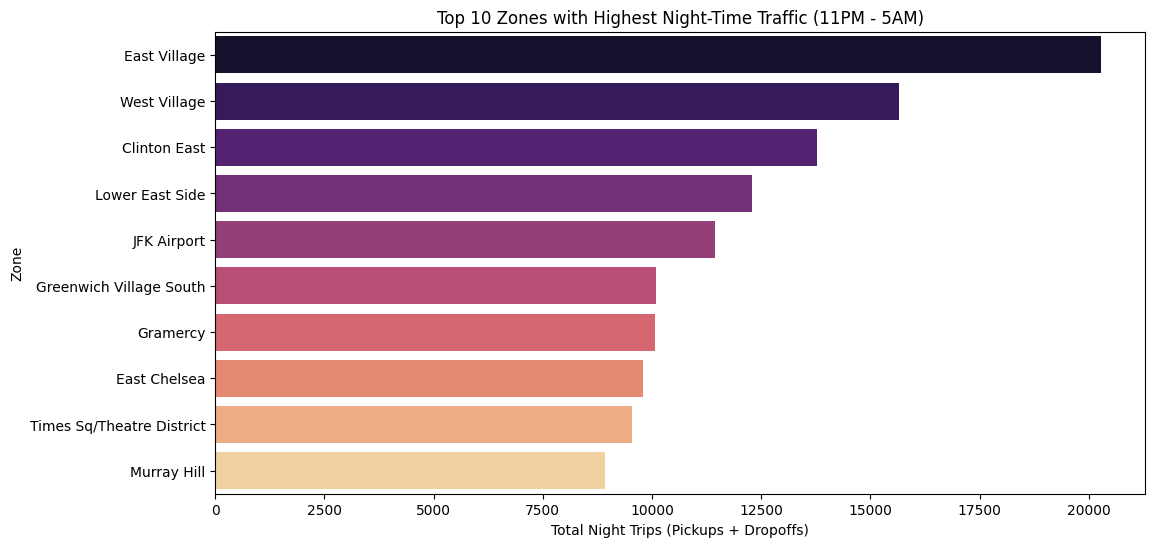

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Extract pickup hour from datetime column
sampled_taxi_records_filtered['pickup_hour'] = sampled_taxi_records_filtered['tpep_pickup_datetime'].dt.hour

# Define night hours (11 PM - 5 AM)
night_hours = list(range(23, 24)) + list(range(0, 6))

# Filter for trips occurring during night hours
night_trips = sampled_taxi_records_filtered[sampled_taxi_records_filtered['pickup_hour'].isin(night_hours)]

# Count pickups and drop-offs per zone during night hours
night_pickup_counts = night_trips['pickup_zone'].value_counts().reset_index()
night_pickup_counts.columns = ['zone', 'pickup_counts']

night_dropoff_counts = night_trips['dropoff_zone'].value_counts().reset_index()
night_dropoff_counts.columns = ['zone', 'dropoff_counts']

# Merge pickup and dropoff counts
night_zone_traffic = pd.merge(night_pickup_counts, night_dropoff_counts, on='zone', how='outer').fillna(0)

# Convert to integers
night_zone_traffic = night_zone_traffic.astype({'pickup_counts': 'int', 'dropoff_counts': 'int'})

# Find top zones with highest night traffic (pickups + dropoffs)
night_zone_traffic['total_night_trips'] = night_zone_traffic['pickup_counts'] + night_zone_traffic['dropoff_counts']
top_night_zones = night_zone_traffic.sort_values(by='total_night_trips', ascending=False).head(10)

# ---- Visualization ----
plt.figure(figsize=(12, 6))
sns.barplot(y=top_night_zones['zone'], x=top_night_zones['total_night_trips'], palette='magma')
plt.title("Top 10 Zones with Highest Night-Time Traffic (11PM - 5AM)")
plt.xlabel("Total Night Trips (Pickups + Dropoffs)")
plt.ylabel("Zone")
plt.show()

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

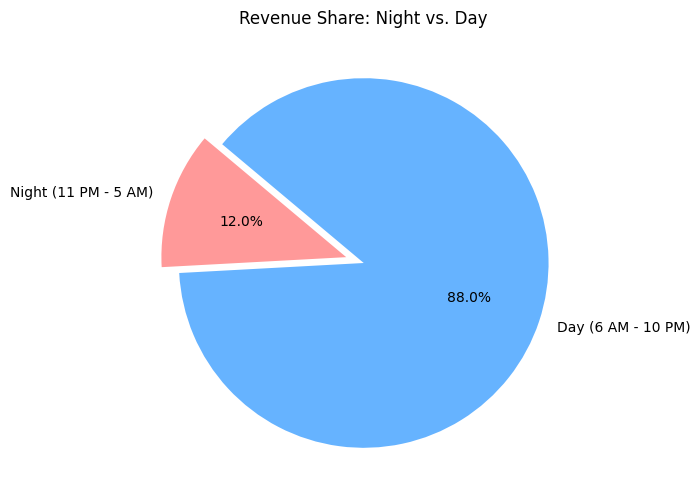

In [ ]:
# Filter for night hours (11 PM to 5 AM)

import pandas as pd
import matplotlib.pyplot as plt

# Define night hours (11 PM - 5 AM)
night_hours = [23, 0, 1, 2, 3, 4, 5]

# Filter day and night trips
day_trips = sampled_taxi_records_filtered[~sampled_taxi_records_filtered['pickup_hour'].isin(night_hours)]
night_trips = sampled_taxi_records_filtered[sampled_taxi_records_filtered['pickup_hour'].isin(night_hours)]

# Calculate revenue for night and day trips
night_revenue = night_trips['total_amount'].sum()
day_revenue = day_trips['total_amount'].sum()

# Creating a dataframe for visualization
revenue_df = pd.DataFrame({
    "Time Period": ["Night (11 PM - 5 AM)", "Day (6 AM - 10 PM)"],
    "Revenue": [night_revenue, day_revenue]
})

# ---- Visualization ----
plt.figure(figsize=(8, 6))
plt.pie(revenue_df['Revenue'], labels=revenue_df['Time Period'], autopct='%1.1f%%',
        colors=['#ff9999', '#66b3ff'], startangle=140, explode=(0.1, 0))

plt.title("Revenue Share: Night vs. Day")
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

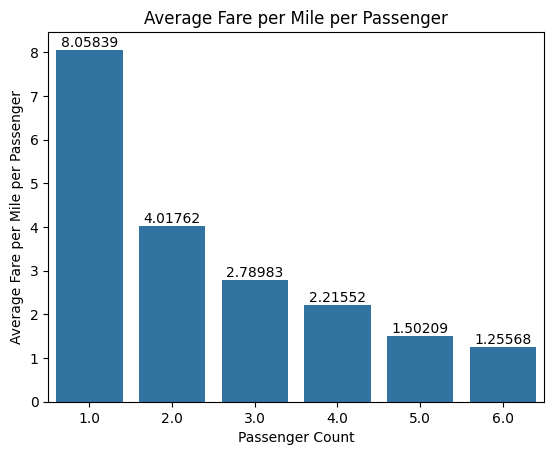

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts

sampled_taxi_records_filtered['fare_per_mile'] = sampled_taxi_records_filtered['fare_amount'] / sampled_taxi_records_filtered['trip_distance'].replace(0, np.nan)
sampled_taxi_records_filtered['fare_per_mile_per_passenger'] = sampled_taxi_records_filtered['fare_per_mile'] / sampled_taxi_records_filtered['passenger_count']
avg_fare_per_mile_per_passenger = sampled_taxi_records_filtered.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()


ax = sns.barplot(x='passenger_count', y='fare_per_mile_per_passenger', data=avg_fare_per_mile_per_passenger)
ax.bar_label(ax.containers[0])
ax.set_title('Average Fare per Mile per Passenger')
ax.set_xlabel('Passenger Count')
ax.set_ylabel('Average Fare per Mile per Passenger')
plt.show()

#Analysis : # This plot shows that the fare per mile per passenger is higher for trips with 1 passenger.

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

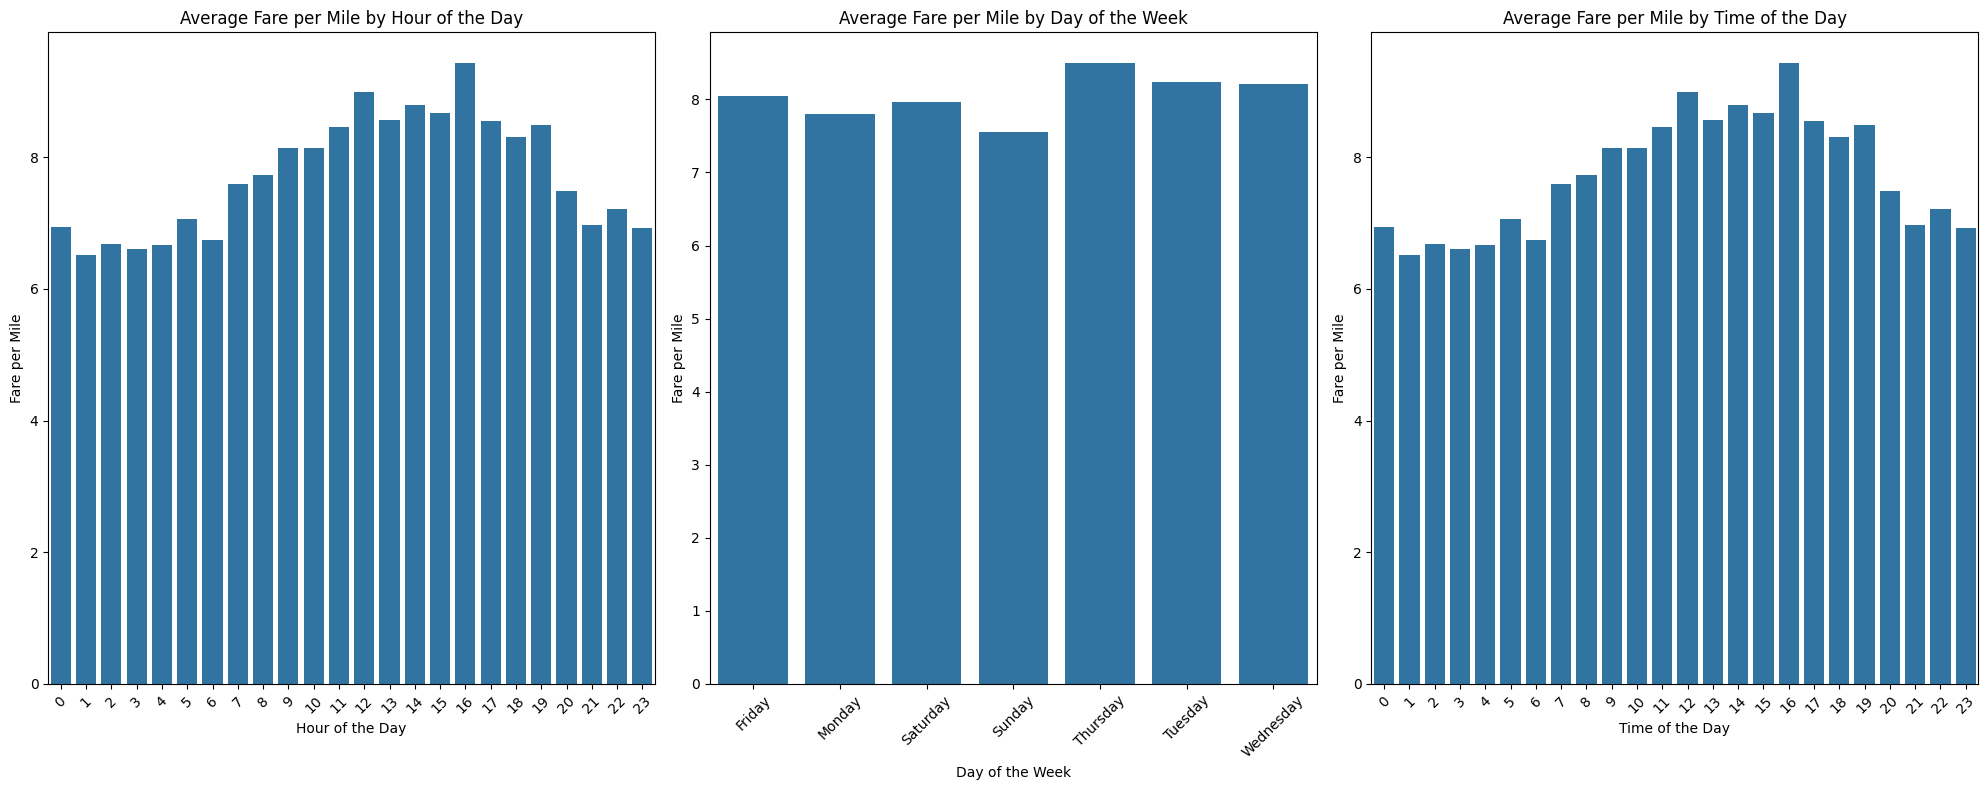

In [ ]:
# Compare the average fare per mile for different days and for different times of the day

#adding pickup time of the day:
sampled_taxi_records_filtered['pickup_time_of_day'] = sampled_taxi_records_filtered['tpep_pickup_datetime'].dt.hour


plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
sns.barplot(x='pickup_hour', y='fare_per_mile', data=sampled_taxi_records_filtered.groupby('pickup_hour')['fare_per_mile'].mean().reset_index())
plt.title('Average Fare per Mile by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.xticks(rotation=45)
plt.ylabel('Fare per Mile')

plt.subplot(1, 3, 2)
sns.barplot(x='pickup_day_of_week', y='fare_per_mile', data=sampled_taxi_records_filtered.groupby('pickup_day_of_week')['fare_per_mile'].mean().reset_index())
plt.title('Average Fare per Mile by Day of the Week')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.ylabel('Fare per Mile')

plt.subplot(1, 3, 3)
sns.barplot(x='pickup_time_of_day', y='fare_per_mile', data=sampled_taxi_records_filtered.groupby('pickup_time_of_day')['fare_per_mile'].mean().reset_index())
plt.title('Average Fare per Mile by Time of the Day')
plt.xlabel('Time of the Day')
plt.xticks(rotation=45)
plt.ylabel('Fare per Mile')

plt.tight_layout()
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

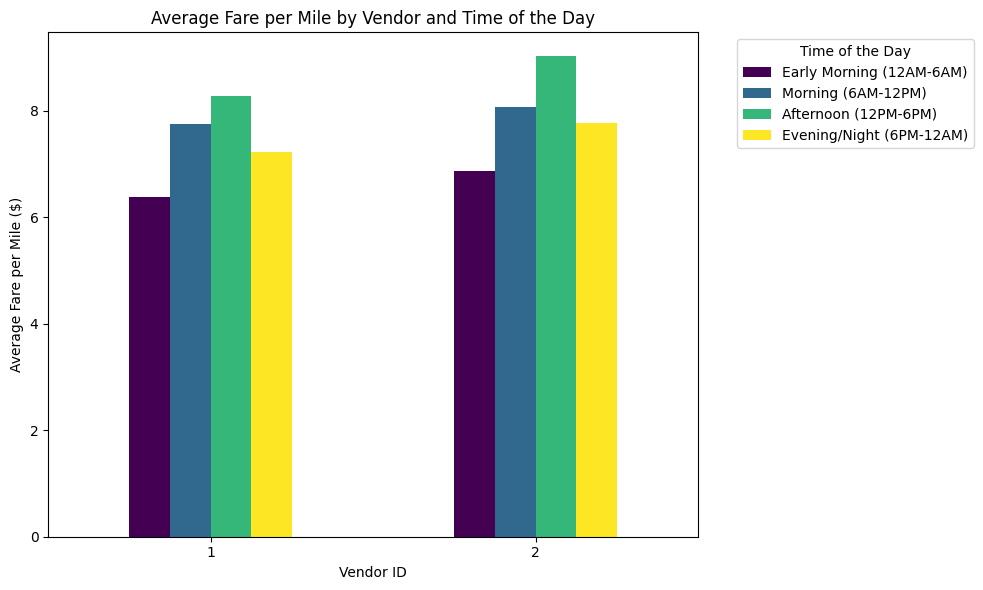

In [ ]:
# Compare fare per mile for different vendors


#Grouping into bins for better analysis:
bins = [0, 6, 12, 18, 24]
labels = ['Early Morning (12AM-6AM)', 'Morning (6AM-12PM)', 'Afternoon (12PM-6PM)', 'Evening/Night (6PM-12AM)']

# Adding new columns to filter based on hour of day:
sampled_taxi_records_filtered['hour_group'] = pd.cut(sampled_taxi_records_filtered['pickup_hour'], bins=bins, labels=labels, right=False)

# Using Pivot table with grouped hours to calculate vendor fare per mile
vendor_fare_per_mile = pd.pivot_table(sampled_taxi_records_filtered, values='fare_per_mile', index='VendorID', columns='hour_group', aggfunc='mean')

# Plotting via bar to analyze :
vendor_fare_per_mile.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Average Fare per Mile by Vendor and Time of the Day')
plt.xlabel('Vendor ID')
plt.ylabel('Average Fare per Mile ($)')
plt.xticks(rotation=0)
plt.legend(title='Time of the Day', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


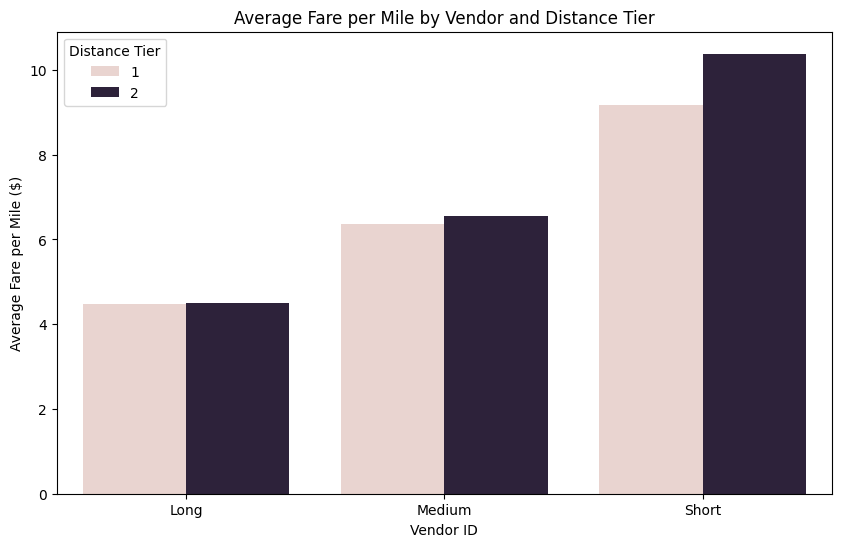

In [ ]:
# Defining distance tiers

#defining the distance_tier fuunction:
def distance_tier(distance):
  if distance <= 2:
    return 'Short'
  elif distance <= 5:
    return 'Medium'
  else:
    return 'Long'

sampled_taxi_records_filtered['distance_tier'] = sampled_taxi_records_filtered['trip_distance'].apply(distance_tier)
tiered_fare_per_mile = sampled_taxi_records_filtered.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='distance_tier', y='fare_per_mile', hue='VendorID', data=tiered_fare_per_mile)
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xlabel('Vendor ID')
plt.ylabel('Average Fare per Mile ($)')
plt.legend(title='Distance Tier')
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

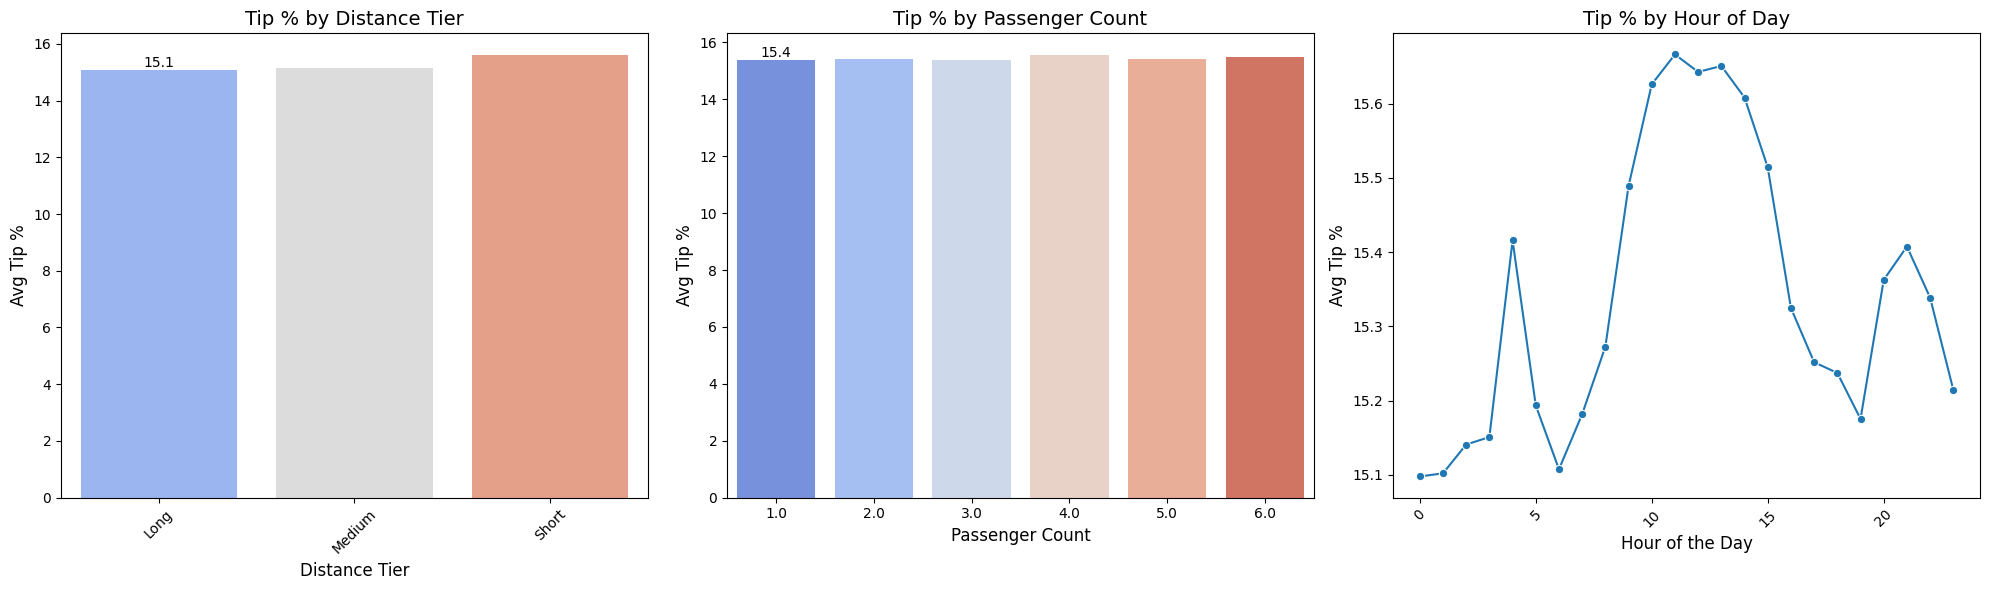

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Ensure tip percentage calculation
sampled_taxi_records_filtered['tip_percentage'] = (sampled_taxi_records_filtered['tip_amount'] / sampled_taxi_records_filtered['total_amount']) * 100

# Create hourly bins instead of using raw time values
sampled_taxi_records_filtered['pickup_hour'] = sampled_taxi_records_filtered['tpep_pickup_datetime'].dt.hour

# Grouping data
distance_tip_percentage = sampled_taxi_records_filtered.groupby('distance_tier')['tip_percentage'].mean().reset_index()
passenger_tip_percentage = sampled_taxi_records_filtered.groupby('passenger_count')['tip_percentage'].mean().reset_index()
time_tip_percentage = sampled_taxi_records_filtered.groupby('pickup_hour')['tip_percentage'].mean().reset_index()

# Plot setup
plt.figure(figsize=(20, 6))

# Distance-based tip percentage
plt.subplot(1, 3, 1)
ax = sns.barplot(x='distance_tier', y='tip_percentage', data=distance_tip_percentage, palette='coolwarm')
plt.title('Tip % by Distance Tier', fontsize=14)
ax.bar_label(ax.containers[0], fmt='%.1f', fontsize=10)
plt.xlabel('Distance Tier', fontsize=12)
plt.ylabel('Avg Tip %', fontsize=12)
plt.xticks(rotation=45)

# Passenger count-based tip percentage
plt.subplot(1, 3, 2)
ax = sns.barplot(x='passenger_count', y='tip_percentage', data=passenger_tip_percentage, palette='coolwarm')
plt.title('Tip % by Passenger Count', fontsize=14)
ax.bar_label(ax.containers[0], fmt='%.1f', fontsize=10)
plt.xlabel('Passenger Count', fontsize=12)
plt.ylabel('Avg Tip %', fontsize=12)
plt.xticks(rotation=0)

# Time of day-based tip percentage
plt.subplot(1, 3, 3)
ax = sns.lineplot(x='pickup_hour', y='tip_percentage', data=time_tip_percentage, palette='coolwarm', marker='o')
plt.title('Tip % by Hour of Day', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Avg Tip %', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

<Figure size 1000x500 with 0 Axes>

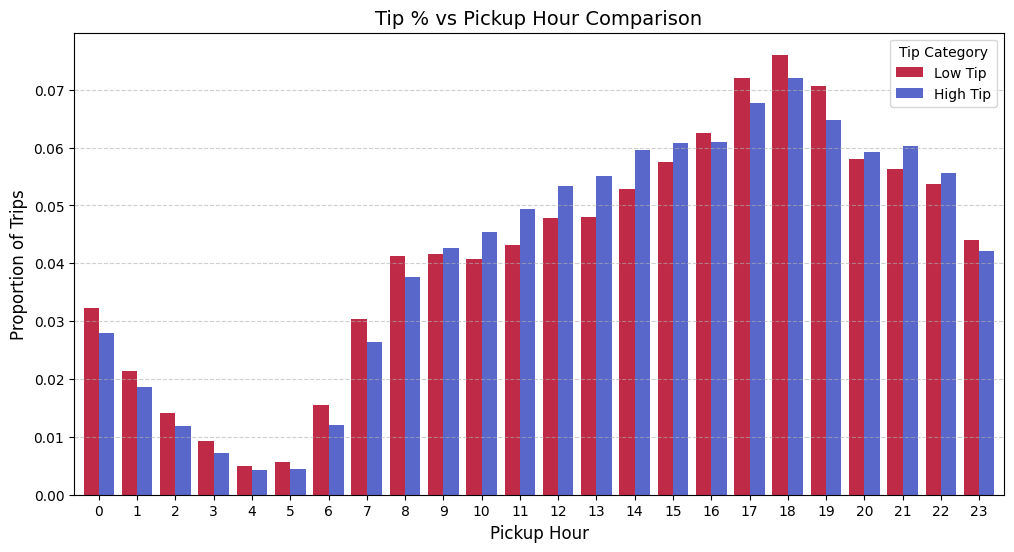

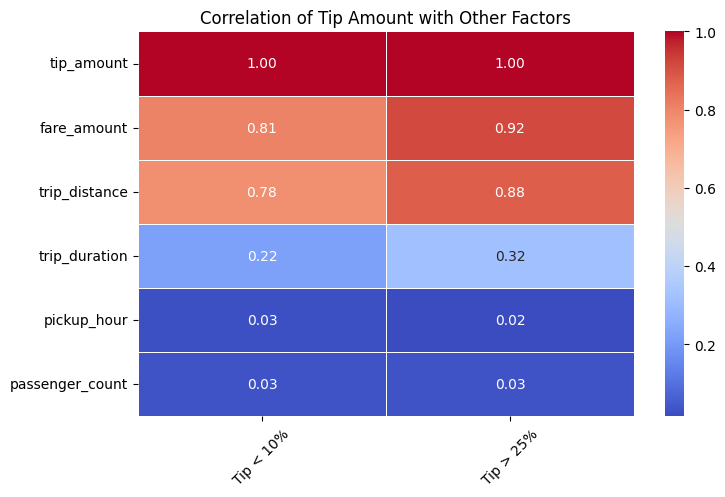

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

# Categorize tips as 'High Tip' (>10%) or 'Low Tip' (≤10%)
sampled_taxi_records_filtered['tip_category'] = sampled_taxi_records_filtered['tip_percentage'].apply(
    lambda x: 'High Tip' if x > 10 else 'Low Tip'
)

# Split data into High Tip and Low Tip groups
low_tip_trips = sampled_taxi_records_filtered[sampled_taxi_records_filtered['tip_category'] == 'Low Tip']
high_tip_trips = sampled_taxi_records_filtered[sampled_taxi_records_filtered['tip_category'] == 'High Tip']

# Analyze trip distance
distance_comparison = pd.DataFrame({
    'Low Tip': low_tip_trips['trip_distance'].describe(),
    'High Tip': high_tip_trips['trip_distance'].describe()
})

# Analyze passenger count
passenger_count_comparison = pd.DataFrame({
    'Low Tip': low_tip_trips['passenger_count'].describe(),
    'High Tip': high_tip_trips['passenger_count'].describe()
})

# Analyze pickup hour distribution (normalized to %)
pickup_time_comparison = pd.DataFrame({
    'Low Tip': low_tip_trips['pickup_hour'].value_counts(normalize=True).sort_index(),
    'High Tip': high_tip_trips['pickup_hour'].value_counts(normalize=True).sort_index()
}).fillna(0)  # Fill missing hours with 0

# Analyze fare amount
fare_amount_comparison = pd.DataFrame({
    'Low Tip': low_tip_trips['fare_amount'].describe(),
    'High Tip': high_tip_trips['fare_amount'].describe()
})

#Select only relevant columns for correlation
columns_to_analyze = ['tip_amount', 'fare_amount', 'trip_distance', 'trip_duration', 'pickup_hour', 'passenger_count']

#Compute correlation of tip percentage with other variables
low_tip_corr = low_tip_trips[columns_to_analyze].corrwith(low_tip_trips['tip_amount']).to_frame(name="Tip < 10%")
high_tip_corr = high_tip_trips[columns_to_analyze].corrwith(high_tip_trips['tip_amount']).to_frame(name="Tip > 25%")

#Concatenate both correlation dataframes
corr_data = pd.concat([low_tip_corr, high_tip_corr], axis=1)


#  Visualizing Tip % vs. Pickup Hour
plt.figure(figsize=(10, 5))
pickup_time_comparison.plot(kind='bar', width=0.8, figsize=(12, 6), colormap='coolwarm_r', alpha=0.85)
plt.title('Tip % vs Pickup Hour Comparison', fontsize=14)
plt.xlabel('Pickup Hour', fontsize=12)
plt.ylabel('Proportion of Trips', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title="Tip Category")
plt.show()


#Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_data, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation of Tip Amount with Other Factors")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

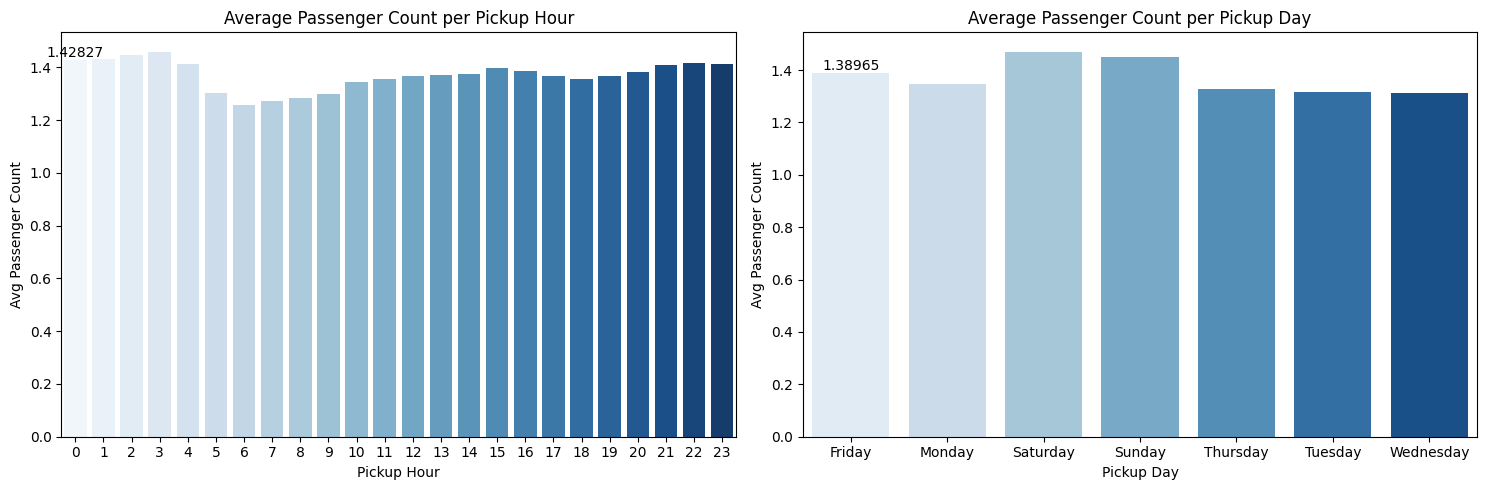

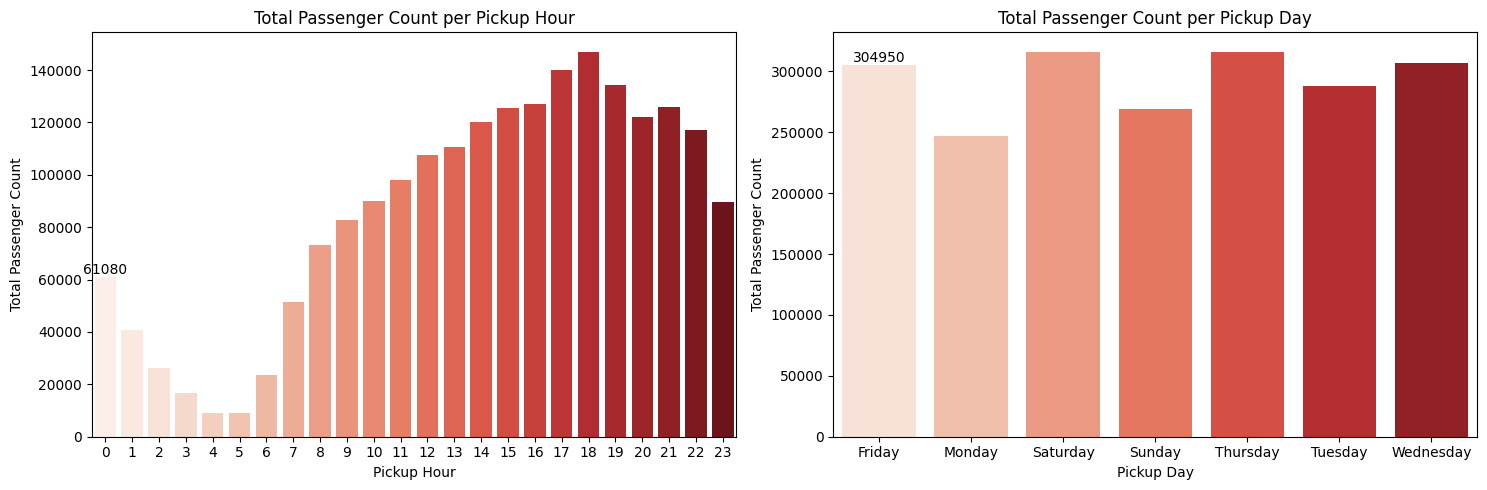

In [ ]:
# See how passenger count varies across hours and days

# Creating subplots for average passenger count analysis
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))

#Average Passenger Count by Hour
ax1.set_title('Average Passenger Count per Pickup Hour')
avg_passenger_hour = sampled_taxi_records_filtered.groupby(['pickup_hour'])['passenger_count'].mean()
sns.barplot(x=avg_passenger_hour.index, y=avg_passenger_hour.values, ax=ax1, palette='Blues')
ax1.set_xlabel('Pickup Hour')
ax1.set_ylabel('Avg Passenger Count')
ax1.bar_label(ax1.containers[0])

#Average Passenger Count by Day
ax2.set_title('Average Passenger Count per Pickup Day')
avg_passenger_day = sampled_taxi_records_filtered.groupby(['pickup_day'])['passenger_count'].mean()
sns.barplot(x=avg_passenger_day.index, y=avg_passenger_day.values, ax=ax2, palette='Blues')
ax2.set_xlabel('Pickup Day')
ax2.set_ylabel('Avg Passenger Count')
ax2.bar_label(ax2.containers[0])

plt.tight_layout()
plt.show()


# Creating subplots for total passenger count analysis
fig, (ax3, ax4) = plt.subplots(ncols=2, figsize=(15, 5))

#Total Passenger Count by Hour
ax3.set_title('Total Passenger Count per Pickup Hour')
total_passenger_hour = sampled_taxi_records_filtered.groupby(['pickup_hour'])['passenger_count'].sum()
sns.barplot(x=total_passenger_hour.index, y=total_passenger_hour.values, ax=ax3, palette='Reds')
ax3.set_xlabel('Pickup Hour')
ax3.set_ylabel('Total Passenger Count')
ax3.bar_label(ax3.containers[0])

#Total Passenger Count by Day
ax4.set_title('Total Passenger Count per Pickup Day')
total_passenger_day = sampled_taxi_records_filtered.groupby(['pickup_day'])['passenger_count'].sum()
sns.barplot(x=total_passenger_day.index, y=total_passenger_day.values, ax=ax4, palette='Reds')
ax4.set_xlabel('Pickup Day')
ax4.set_ylabel('Total Passenger Count')
ax4.bar_label(ax4.containers[0])

plt.tight_layout()
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

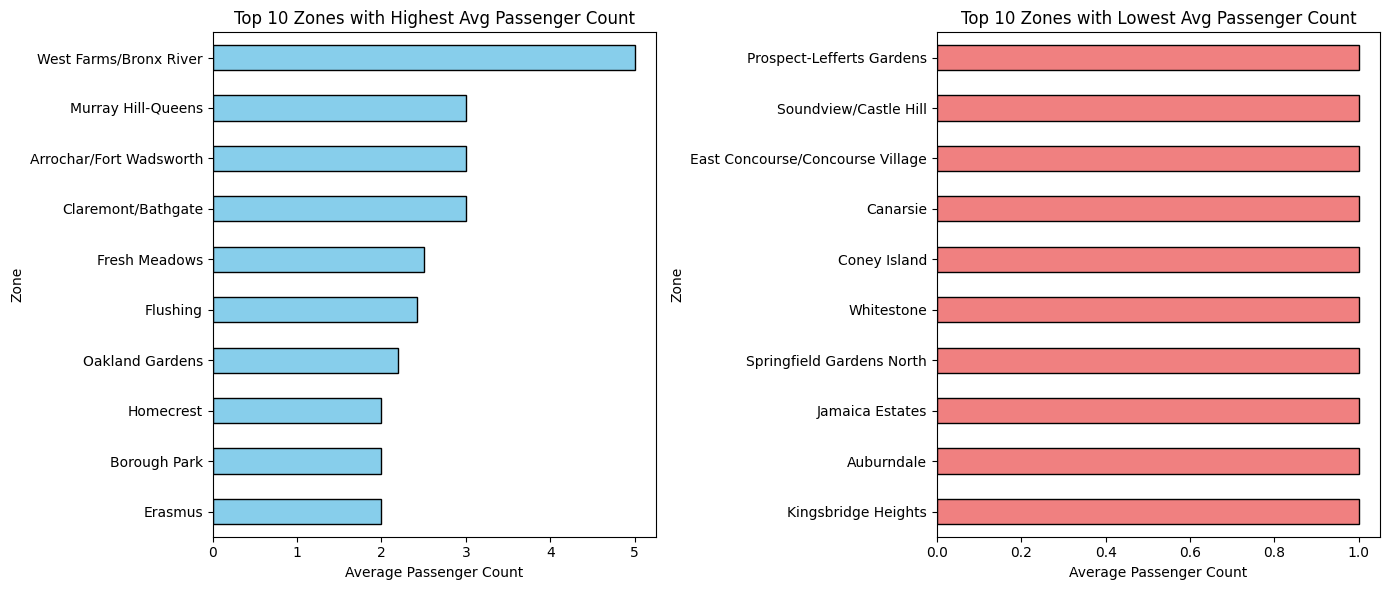

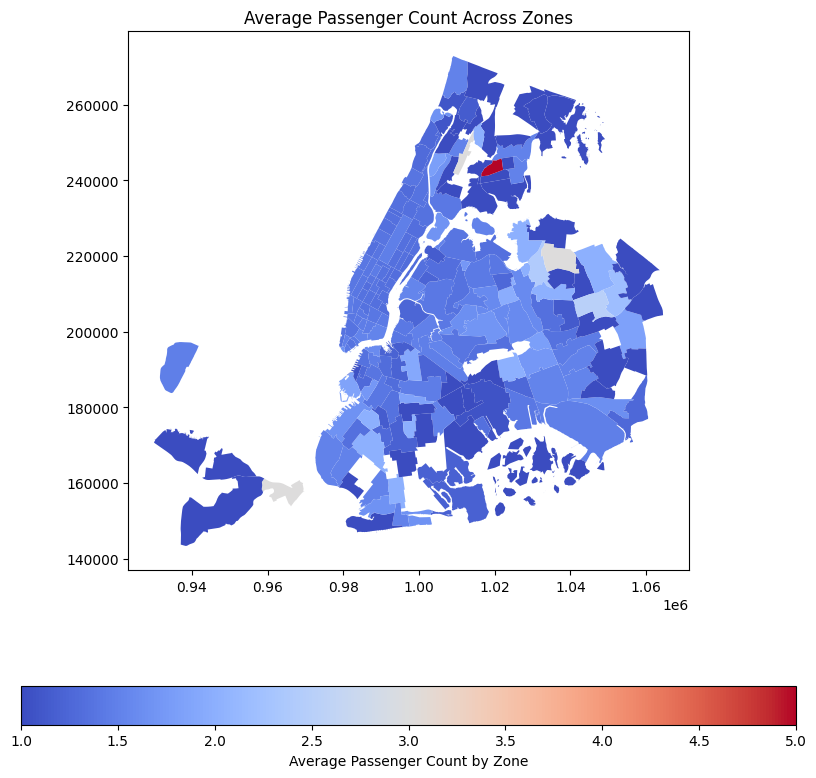

In [ ]:
# How does passenger count vary across zones


# My Comment : Filter out rows where 'passenger_count' is NaN or 0
filtered_zones = sampled_taxi_records_filtered[sampled_taxi_records_filtered['passenger_count'].notna() &
                                               (sampled_taxi_records_filtered['passenger_count'] > 0)]

# My Comment : Add/Replace the column in zones DataFrame
zones['avg_passenger_count'] = zones['zone'].map(
    filtered_zones.groupby('pickup_zone')['passenger_count'].mean()
)

# My Comment : Get the top 10 highest and lowest zones by avg passenger count
top_10_highest = zones[['zone', 'avg_passenger_count']].nlargest(10, 'avg_passenger_count').set_index('zone')
top_10_lowest = zones[['zone', 'avg_passenger_count']].nsmallest(10, 'avg_passenger_count').set_index('zone')

# My Comment : Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# My Comment : Plot top 10 highest zones
top_10_highest['avg_passenger_count'].plot(kind='barh', color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_xlabel('Average Passenger Count')
axes[0].set_ylabel('Zone')
axes[0].set_title('Top 10 Zones with Highest Avg Passenger Count')
axes[0].invert_yaxis()  # Invert y-axis so highest values are on top

# My Comment : Plot top 10 lowest zones
top_10_lowest['avg_passenger_count'].plot(kind='barh', color='lightcoral', edgecolor='black', ax=axes[1])
axes[1].set_xlabel('Average Passenger Count')
axes[1].set_ylabel('Zone')
axes[1].set_title('Top 10 Zones with Lowest Avg Passenger Count')
axes[1].invert_yaxis()  # Invert y-axis so lowest values are on top

plt.tight_layout()
plt.show()

# My Comment : Plot the zones with average passenger count (optional: you can adjust color scale)
fig, ax = plt.subplots(figsize=(10, 10))
zones.plot(column='avg_passenger_count', ax=ax, legend=True,
           legend_kwds={'label': "Average Passenger Count by Zone", 'orientation': "horizontal"},
           cmap='coolwarm')

plt.title('Average Passenger Count Across Zones')
plt.show()


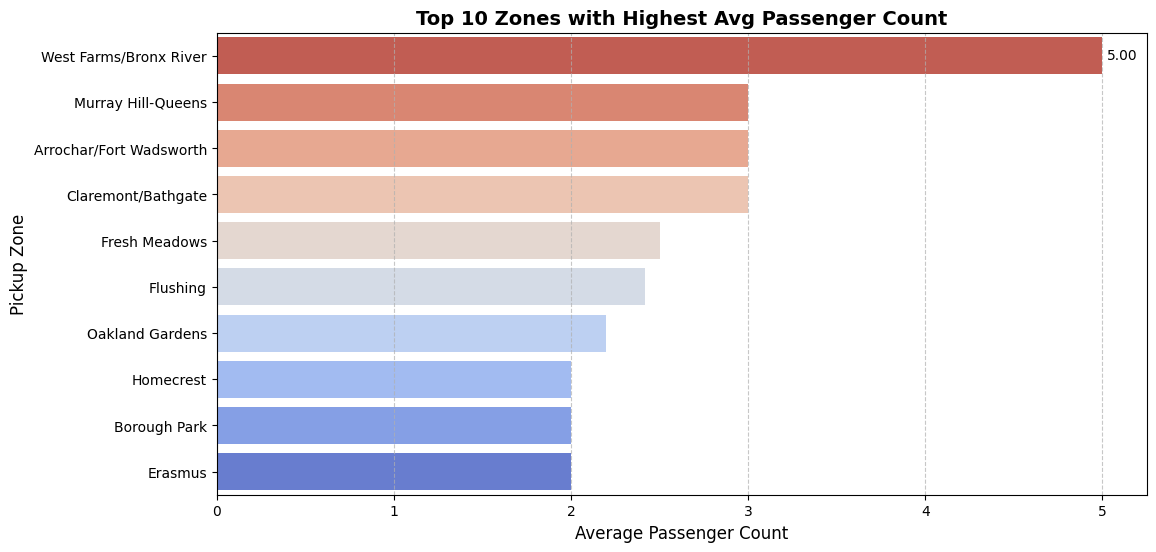

In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

#Compute total passenger counts and number of trips per pickup zone
pickup_zone_passenger_counts = sampled_taxi_records_filtered.groupby('pickup_zone').agg(
    passenger_count=('passenger_count', 'sum'),
    Number_of_trips=('pickup_zone', 'count')  # Count the number of trips
).reset_index()

#Merge the computed data with zones dataset
zones_with_trips = zones.merge(pickup_zone_passenger_counts, left_on='zone', right_on='pickup_zone', how='left')

#Calculate the average passenger count per trip
zones_with_trips['average_passenger_count'] = zones_with_trips['passenger_count'] / zones_with_trips['Number_of_trips']

#Select the top 10 zones with the highest average passenger count
top_10_zones = zones_with_trips.nlargest(10, 'average_passenger_count')

#Plot the Top 10 Zones by Avg Passenger Count
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='average_passenger_count', y='zone', data=top_10_zones, palette='coolwarm_r')

#Annotate bars with values
ax.bar_label(ax.containers[0], fmt="%.2f", padding=3)

plt.xlabel("Average Passenger Count", fontsize=12)
plt.ylabel("Pickup Zone", fontsize=12)
plt.title("Top 10 Zones with Highest Avg Passenger Count", fontsize=14, fontweight="bold")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

Percentage of trips with each surcharge applied:
improvement_surcharge    100.00
mta_tax                   99.45
congestion_surcharge      95.10
extra                     63.81
airport_fee                8.49
dtype: float64


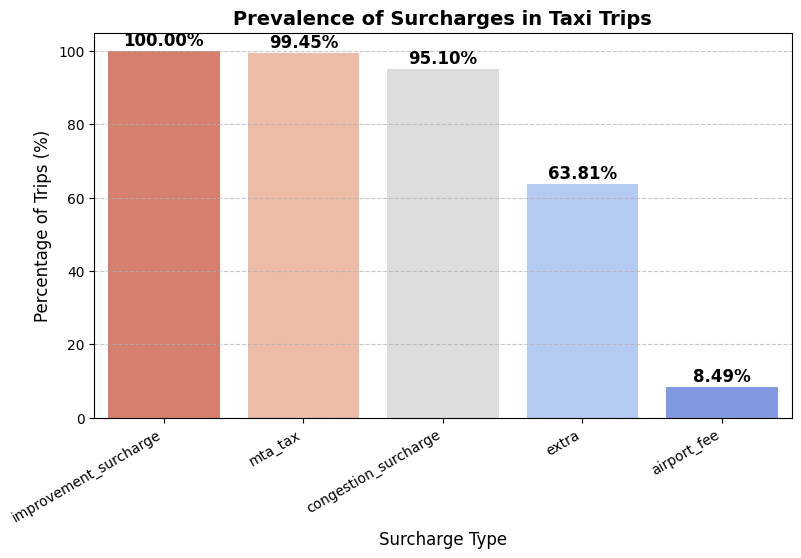

In [ ]:
# How often is each surcharge applied?

#Define surcharge columns to analyze
surcharge_columns = ["extra", "mta_tax", "improvement_surcharge", "congestion_surcharge", "airport_fee"]

#Calculate percentage of trips with each surcharge applied
surcharge_counts = (sampled_taxi_records_filtered[surcharge_columns] > 0).sum()  # Count non-zero values
surcharge_percent = (surcharge_counts / len(sampled_taxi_records_filtered)) * 100  # Convert to percentage

#Sort values in descending order for better visualization
surcharge_percent = surcharge_percent.sort_values(ascending=False).round(2)

#Display the percentages
print("Percentage of trips with each surcharge applied:")
print(surcharge_percent)

#Plot the Top 5 most prevalent surcharges
plt.figure(figsize=(9, 5))  # Increase figure width for better spacing
sns.barplot(x=surcharge_percent.index, y=surcharge_percent.values, palette="coolwarm_r")

plt.xlabel("Surcharge Type", fontsize=12)
plt.ylabel("Percentage of Trips (%)", fontsize=12)
plt.title("Prevalence of Surcharges in Taxi Trips", fontsize=14, fontweight="bold")
plt.ylim(0, surcharge_percent.max() + 5)  # Dynamic y-limit for better label spacing

#Show percentage values on bars with improved placement
for i, v in enumerate(surcharge_percent.values):
    plt.text(i, v + 1.5, f"{v:.2f}%", ha="center", fontsize=12, fontweight="bold", color='black')

plt.xticks(rotation=30, ha="right")  # Rotate labels for clarity
plt.grid(axis="y", linestyle="--", alpha=0.7)

#how the plot
plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

Peak-Hour Fleet Allocation:

Increase taxi availability in Midtown, JFK, and entertainment districts during peak times.
Deploy extra taxis from 5 PM - 7 PM on weekdays and 10 PM - 3 AM on weekends.
Dynamic Routing & Real-Time Traffic Integration:

Utilize real-time traffic data to reroute taxis away from congested areas.
Avoid slow routes identified in analysis to minimize passenger wait times.
Geofencing & Incentives for Balanced Distribution:

Implement priority dispatching & dynamic pricing for high-demand zones.
Offer incentives for drivers to operate in low-demand areas (e.g., discounts, bonuses).
Reducing Empty Trips & Idle Time:m

Match incoming taxis with outgoing passengers at JFK and LaGuardia.
Improve taxi allocation in areas like Times Square where drop-offs outnumber pickups.
Customer Experience & Service Quality:

Deploy more taxis in zones with high tip percentages.
Encourage drivers to balance short and long trips for revenue optimization.
Offer fare discounts in off-peak hours to encourage steady demand.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

1. Time-Based Fleet Positioning
Weekday Mornings (7 AM - 10 AM):
Deploy more taxis in residential areas (Brooklyn, Queens) to serve office commuters.
Position taxis near subway & train stations for last-mile service.
Evening Rush (3 PM - 7 PM):
Increase presence in business districts, Midtown, and Financial District.
Allocate extra cabs to JFK, LaGuardia, and Penn Station for commuter & airport demand.
Late Night (10 PM - 3 AM):
Shift cabs to nightlife zones (Times Square, Lower East Side, Williamsburg).
Cover airports & major hotels for night travelers.
2. Weekday vs. Weekend Optimization
Weekdays: Prioritize business-heavy areas (Midtown, Downtown).
Weekends: Shift focus to entertainment, nightlife, and shopping districts.
Sunday Nights: Increase taxis at airports & transit hubs to accommodate travelers.
3. Seasonal & Event-Based Planning
Summer (May - August):
Deploy more cabs in tourist zones (Central Park, Coney Island, Rockaway Beach).
Increase airport taxi availability due to high travel demand.
Winter (November - February):
Focus on shopping hubs (Fifth Avenue, SoHo, outlet malls) for holiday traffic.
Holidays & Events:
Increase taxis for festivals, sports events, and New Year's Eve celebrations.
4. Optimizing for Fare & Distance
Short-Distance Trips:
Position cabs in business districts & shopping areas where fares per mile are highest.
Long-Distance Rides:
Balance fleet to airports & suburban routes for steady earnings.
5. Reducing Empty Trips & Improving Fleet Efficiency
Incentivize drivers to accept trips from high drop-off, low pickup areas (Times Square, JFK).
Use real-time demand tracking to rebalance fleet dynamically.
Geo-fencing strategies: Alert drivers to move into high-demand areas when needed.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

Data-Driven Pricing Strategy Adjustments for Maximized Revenue and Competitiveness

1. Customer Segmentation and Tiered Pricing

Analyze Customer Data: Segment customers based on purchase history, demographics, and usage patterns to understand price sensitivity.

Tiered Pricing Structure: Offer different fare tiers:

Premium Riders: Higher pricing with priority access and premium vehicle options.

Frequent Riders: Discounts or loyalty programs for repeat customers.

Price-Sensitive Riders: Off-peak discounts to encourage usage.

2. Dynamic Pricing Adjustments

Real-Time Demand Analysis: Adjust pricing dynamically based on demand fluctuations due to time of day, seasonality, and special events.

Peak-Hour Pricing (5 PM - 7 PM & 11 PM - 5 AM): Increase base fares and per-mile rates to capitalize on high demand.

Off-Peak Discounts (10 AM - 3 PM, Weekdays): Lower base fares to improve fleet utilization.

3. Distance-Based Pricing Strategy

Short Trips (≤ 2 miles): Keep fares competitive to attract customers and introduce "short-ride" promotions.

Medium Trips (2-5 miles): Slight fare increase due to high demand while maintaining affordability.

Long Trips (> 5 miles): Implement tiered pricing to maximize revenue while staying competitive with other transport options.

4. Competitive Price Monitoring

Price Intelligence Tools: Use software to track competitor pricing and adjust fares accordingly.

Surge Pricing During Competitor Spikes: When competitors increase fares, adjust rates dynamically to capture demand.

5. Surge Pricing for High-Demand Locations & Time Periods

Time-Based Surge Pricing:

Rush Hours & Nightlife Zones: Increase fares in Midtown, Times Square, and entertainment hubs.

Weekend and Event-Based Pricing: Adjust fares for concerts, sports events, and festivals.

Zone-Based Surge Pricing: Implement dynamic multipliers in areas where demand exceeds supply.

6. Cost-Based Adjustments & Margin Optimization

Regular Margin Analysis: Review operational costs and adjust fares accordingly.

Cost-Adjusted Pricing Model: If fuel or maintenance costs rise, adjust fare structures while ensuring competitiveness.

7. Incentives for Airport Trips

Flat-Rate Pricing:

JFK to Manhattan: $55

LaGuardia to Manhattan: $40

Discounted Return Trips: Encourage round-trip bookings by offering a discount on the return ride.

8. Passenger Count & Fare Adjustments

Group Ride Incentives:

Lower per-passenger rates for shared rides.

Flat pricing for 3+ passengers to increase occupancy.

Suggested Tip Amounts: Implement preset tipping suggestions in digital payments to boost driver earnings.

9. Customer Retention & Incentive Programs

Loyalty & Subscription Plans:

Monthly ride passes with discounted fares.

Corporate premium packages with priority service.

Referral & Rewards-Based Discounts: Encourage referrals with ride discounts.

Special Promotions for Underutilized Zones: Offer discounts in areas with lower taxi activity to stimulate demand.